# Digit

# Load library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import  datasets

%matplotlib inline
%config InlineBackend.figureformat = 'retina'

# Load dataset

In [4]:
dataobj = datasets.load_digits()

In [6]:
X = pd.DataFrame(dataobj.data, columns=list(dataobj.feature_names))
X.head(10)

pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   
5        0.0        0.0       12.0       10.0        0.0        0.0   
6        0.0        0.0        0.0       12.0       13.0        0.0   
7        0.0        0.0        7.0        8.0       13.0       16.0   
8        0.0        0.0        9.0       14.0        8.0        1.0   
9        0.0        0.0       11.0       12.0        0.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        5.0        0.0   
3        0.0        0.0        0.0        8.0  ...        9.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   
5        0.0        0.0        0.0        0.0  ...        4.0        0.0   
6        0.0        0.0        0.0        0.0  ...        8.0        0.0   
7       15.0        1.0        0.0        0.0  ...        0.0        0.0   
8        0.0        0.0        0.0        0.0  ...        8.0        0.0   
9        0.0        0.0        0.0        2.0  ...        4.0        0.0   

   pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
0        0.0        0.0        6.0       13.0       10.0        0.0   
1        0.0        0.0        0.0       11.0       16.0       10.0   
2        0.0        0.0        0.0        3.0       11.0       16.0   
3        0.0        0.0        7.0       13.0       13.0        9.0   
4        0.0        0.0        0.0        2.0       16.0        4.0   
5        0.0        0.0        9.0       16.0       16.0       10.0   
6        0.0        0.0        1.0        9.0       15.0       11.0   
7        0.0        0.0       13.0        5.0        0.0        0.0   
8        0.0        0.0       11.0       16.0       15.0       11.0   
9        0.0        0.0        9.0       12.0       13.0        3.0   

   pixel_7_6  pixel_7_7  
0        0.0        0.0  
1        0.0        0.0  
2        9.0        0.0  
3        0.0        0.0  
4        0.0        0.0  
5        0.0        0.0  
6        3.0        0.0  
7        0.0        0.0  
8        1.0        0.0  
9        0.0        0.0  

[10 rows x 64 columns]

In [8]:
y = pd.DataFrame(dataobj.target, columns=['target'])
y.head(10)

target
0       0
1       1
2       2
3       3
4       4
5       5
6       6
7       7
8       8
9       9

In [10]:
df = pd.concat([X, y], axis=1)
df

pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0        9.0        1.0   
1           0.0        0.0        0.0       12.0       13.0        5.0   
2           0.0        0.0        0.0        4.0       15.0       12.0   
3           0.0        0.0        7.0       15.0       13.0        1.0   
4           0.0        0.0        0.0        1.0       11.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10.0       14.0        8.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0           0.0        0.0        0.0        0.0  ...        0.0        0.0   
1           0.0        0.0        0.0        0.0  ...        0.0        0.0   
2           0.0        0.0        0.0        0.0  ...        0.0        0.0   
3           0.0        0.0        0.0        8.0  ...        0.0        0.0   
4           0.0        0.0        0.0        0.0  ...        0.0        0.0   
...         ...        ...        ...        ...  ...        ...        ...   
1792        0.0        0.0        0.0        1.0  ...        0.0        0.0   
1793        1.0        0.0        0.0        0.0  ...        0.0        0.0   
1794        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1795        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1796        0.0        0.0        0.0        2.0  ...        0.0        0.0   

      pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  \
0           0.0        6.0       13.0       10.0        0.0        0.0   
1           0.0        0.0       11.0       16.0       10.0        0.0   
2           0.0        0.0        3.0       11.0       16.0        9.0   
3           0.0        7.0       13.0       13.0        9.0        0.0   
4           0.0        0.0        2.0       16.0        4.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        2.0       14.0       15.0        9.0        0.0   
1793        0.0        6.0       16.0       14.0        6.0        0.0   
1794        0.0        2.0        9.0       13.0        6.0        0.0   
1795        0.0        5.0       12.0       16.0       12.0        0.0   
1796        1.0        8.0       12.0       14.0       12.0        1.0   

      pixel_7_7  target  
0           0.0       0  
1           0.0       1  
2           0.0       2  
3           0.0       3  
4           0.0       4  
...         ...     ...  
1792        0.0       9  
1793        0.0       0  
1794        0.0       8  
1795        0.0       9  
1796        0.0       8  

[1797 rows x 65 columns]

# Explore Dataset

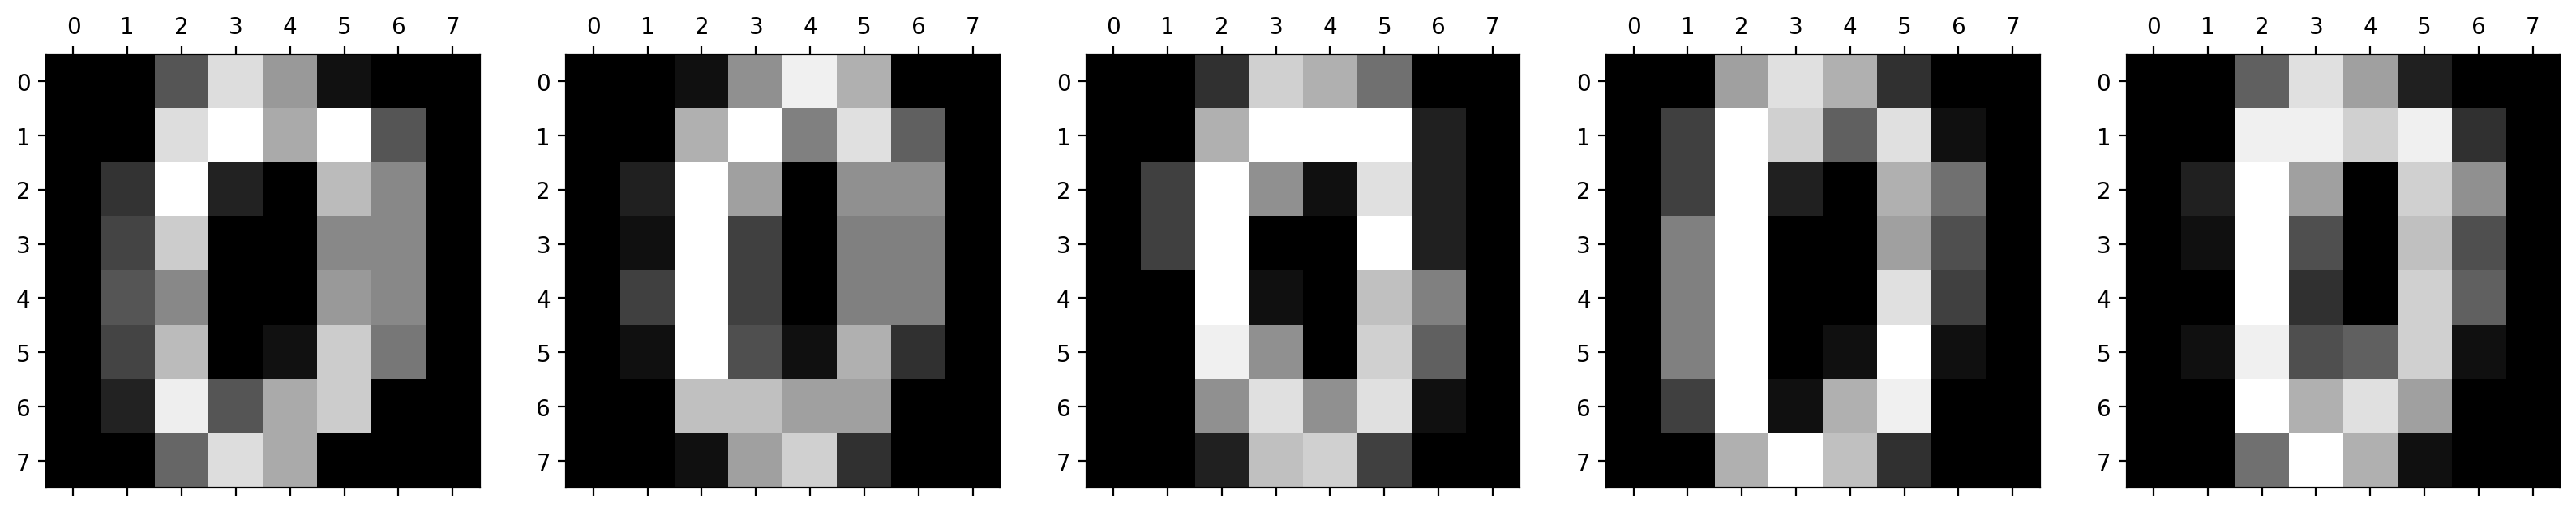

In [31]:
## ploting digit
number = 0
n = 5

fig, ax = plt.subplots(1, n, figsize=(20,20))
ax=ax.ravel()
for i in range(n):
    temp = df[df.target == number].drop('target', axis=1).to_numpy()[i].reshape(8, -1)
    ax[i].matshow(temp, cmap='gray')
    

# Spliting Data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=1, stratify=y)

# Standardized

In [35]:
scl = StandardScaler()
scl.fit(X_train)

StandardScaler()

In [36]:
X_train_s = scl.transform(X_train)
X_test_s = scl.transform(X_test)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
def run_train(X_train, y_train, X_test, y_test):
    model_set = [
        ('LogisticRegression', LogisticRegression()),
        ('KNeighborsClassifier', KNeighborsClassifier()),
        ('SVC', SVC()),
        ('DecisionTreeClassifier', DecisionTreeClassifier()),
        ('RandomForestClassifier', RandomForestClassifier()),
        ('GradientBoostingClassifier', GradientBoostingClassifier()),
    ]
    
    for model in model_set:
        m = model[1].fit(X_train, y_train)
        print(f'Model : {model[0]} \n')
        print(f'Train Acc : {m.score(X_train, y_train)}, Test Acc : {m.score(X_test, y_test)} \n')
        print('--' *50 + '\n')

# Training with PCA

In [45]:
from sklearn.decomposition import PCA
n_component = X_train.shape[1]
pca = PCA(n_components=n_component)
pca.fit(X_train_s)

PCA(n_components=64)

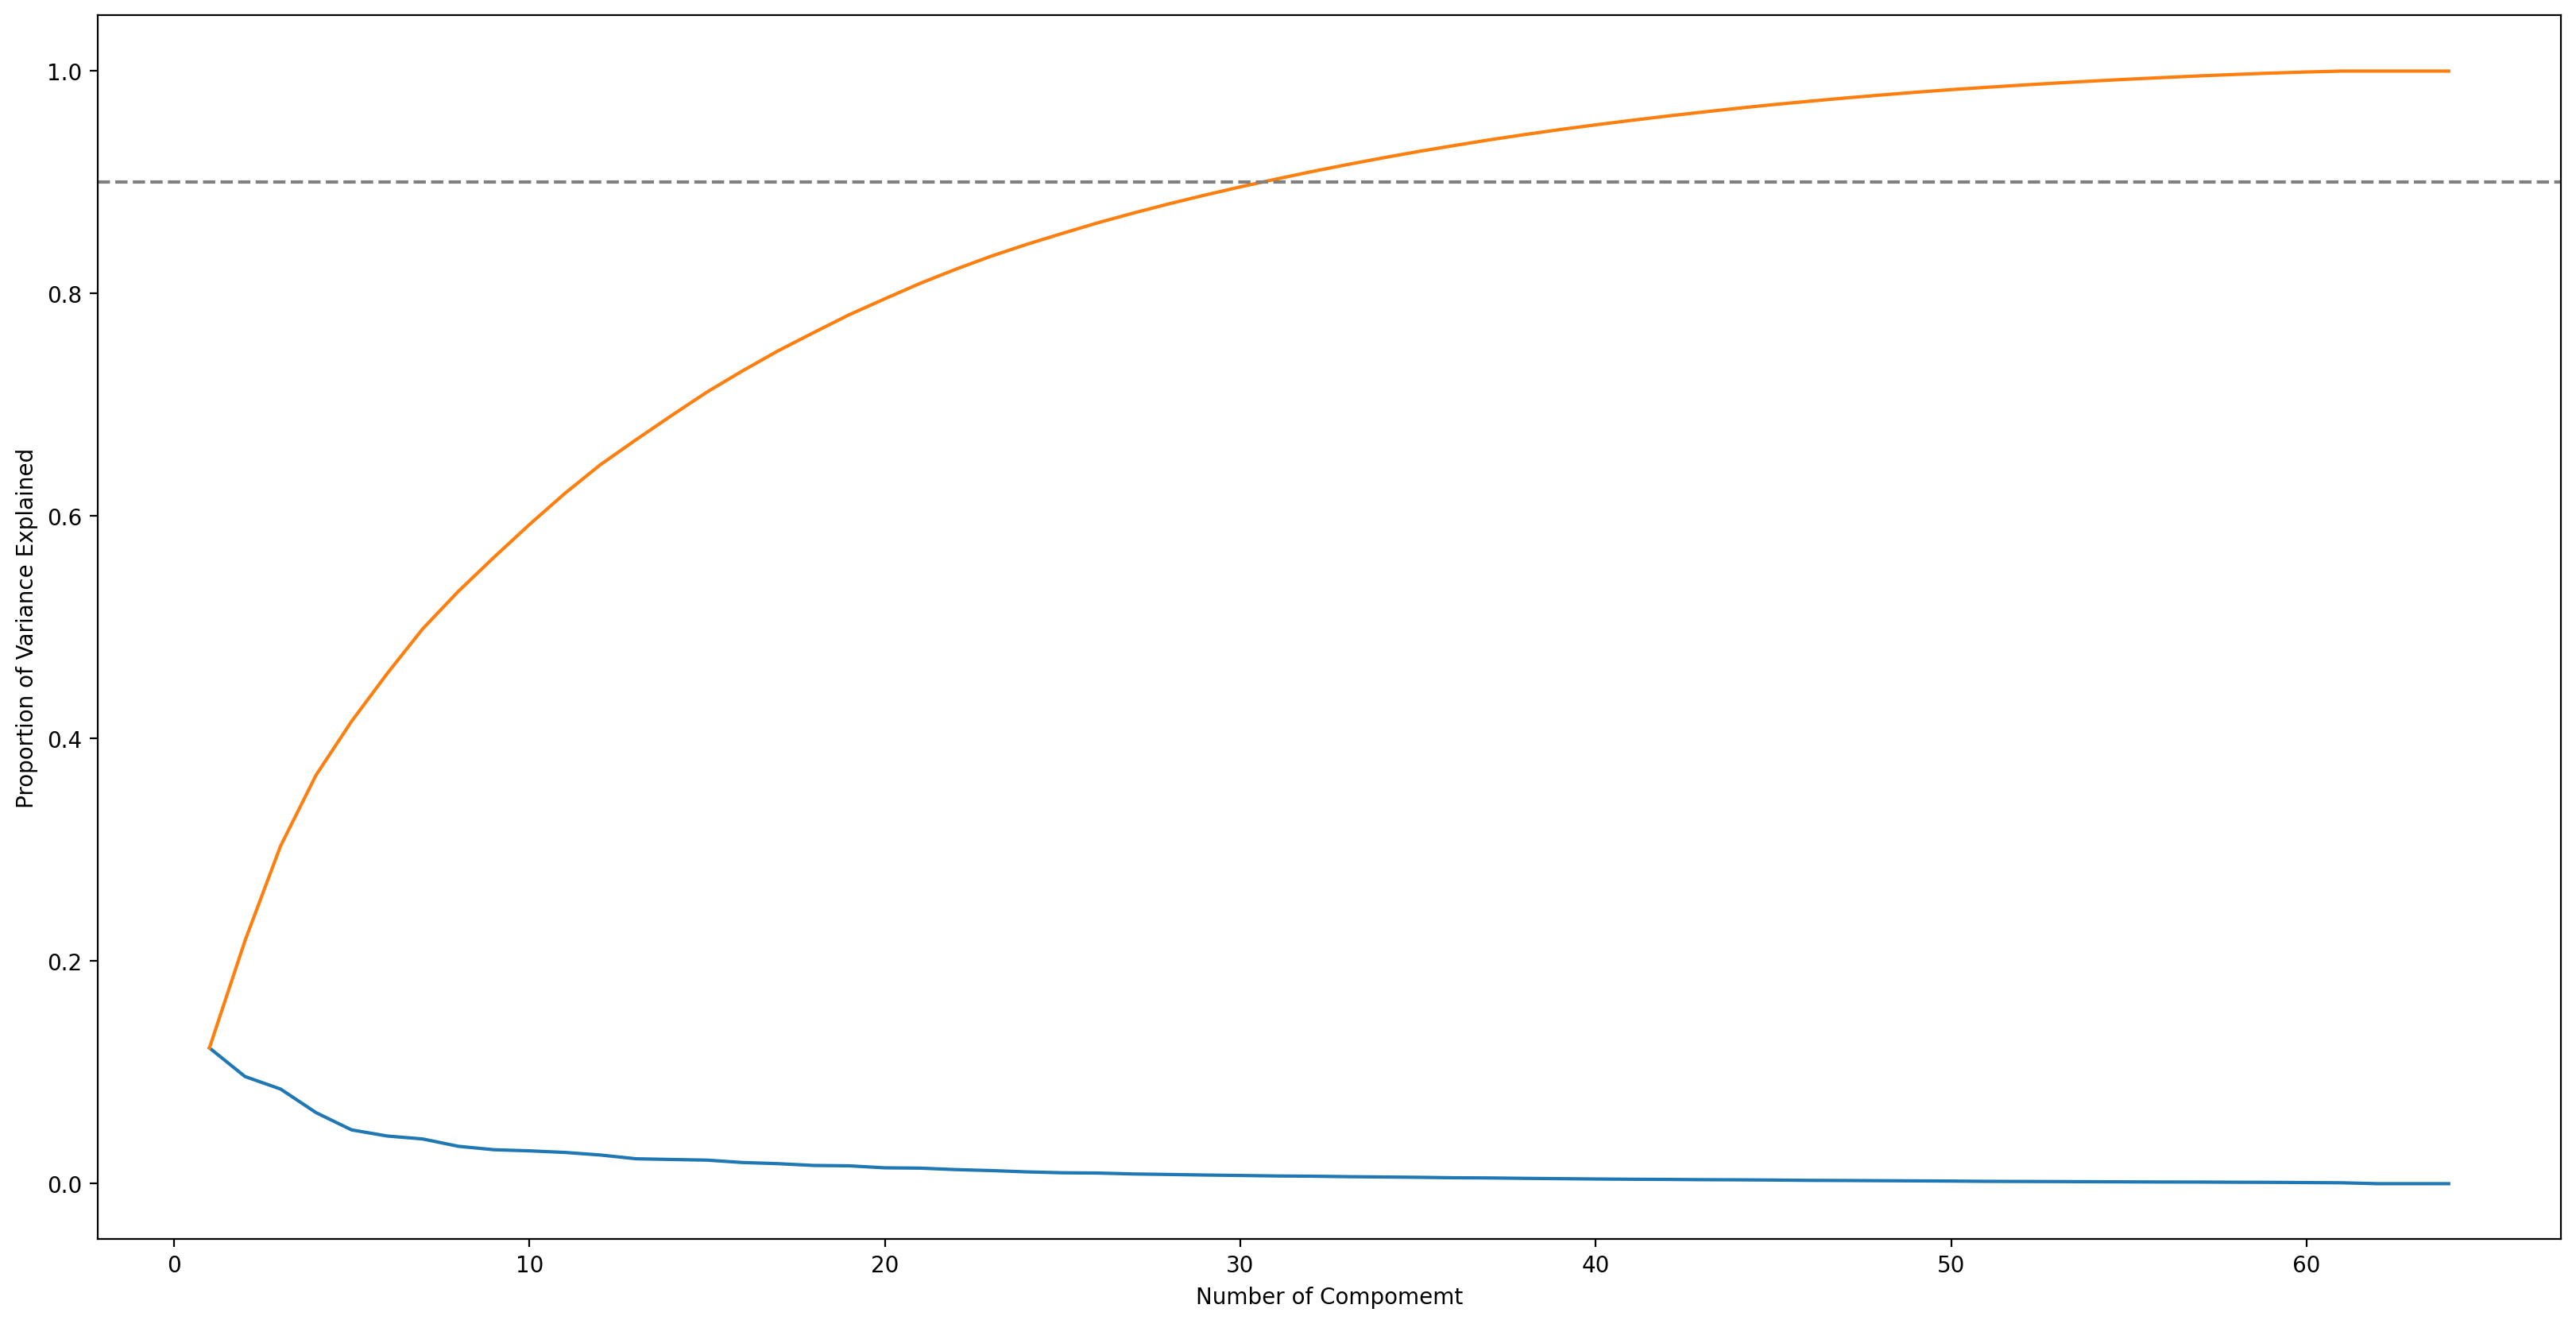

In [51]:
x = np.arange(1, n_component+1)
y1 = pca.explained_variance_ratio_
y2 = np.cumsum(y1)

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(x, y1, label='Explained Variance Ratio')
ax.plot(x, y2, label='Cumulative Explained Variance Ratio')
ax.axhline(.9, linestyle='--', color='.5')
ax.set_xlabel('Number of Compomemt')
ax.set_ylabel('Proportion of Variance Explained');

In [93]:
#n_compos = [1, 5, 10, 15, 20, 25, 30, 35]
#for n_compo in n_compos:
#    pca = PCA(n_components=n_compo)
#    X_train_pca = pca.fit_transform(X_train_s)
#    X_test_pca = pca.transform(X_test_s)
    
#    print(f'Number of Component : {n_compo} \n')
#    run_train(X_train_pca, y_train, X_test_pca, y_test)

# Training with LDA

In [96]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=9)
lda.fit(X_train_s, y_train)

/Users/jessadakorn/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=9)

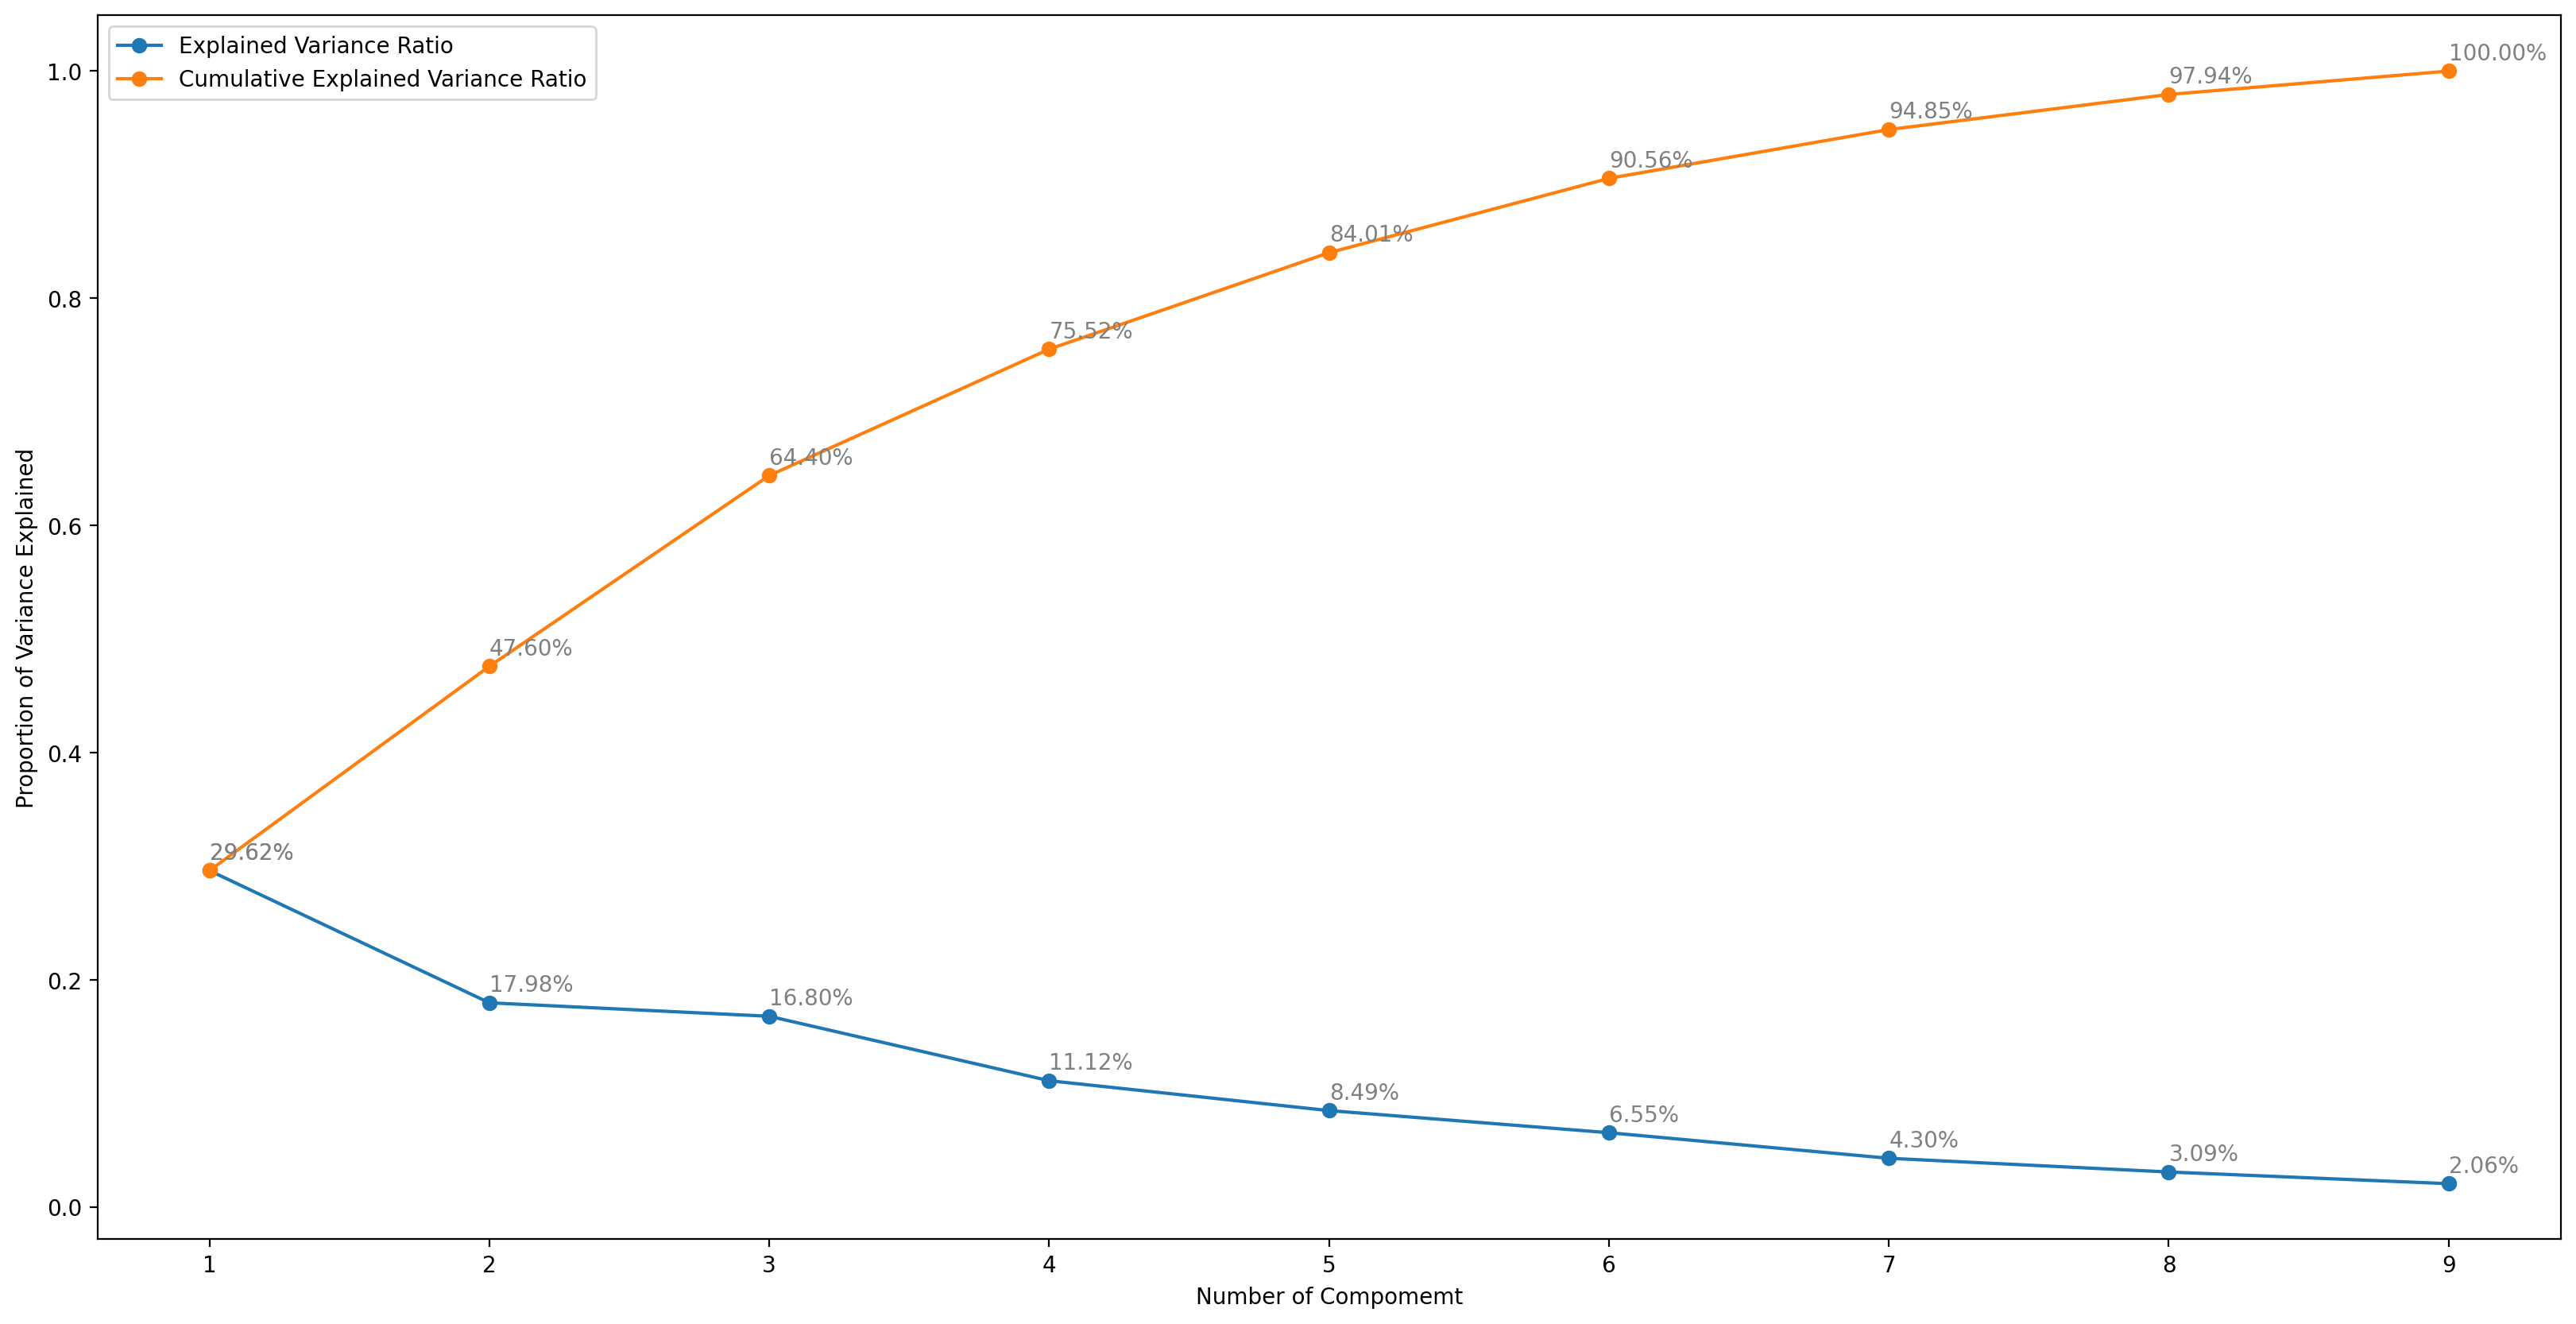

In [100]:
x = np.arange(1, 10)
y1 = lda.explained_variance_ratio_
y2 = np.cumsum(y1)

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(x, y1, marker='o', label='Explained Variance Ratio')
ax.plot(x, y2, marker='o', label='Cumulative Explained Variance Ratio')
ax.set_xlabel('Number of Compomemt')
ax.set_ylabel('Proportion of Variance Explained')
for x, y1, y2 in zip(x, y1, y2):
    ax.text(x, y1+.01, f'{y1*100:.2f}%', color='.5')
    ax.text(x, y2+.01, f'{y2*100:.2f}%', color='.5')
ax.legend();

# For Visualization using PCA LDA KPCA UMAP

# PCA

In [58]:
scale = StandardScaler()
X_s = scale.fit_transform(X)

In [59]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [64]:
## PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_s)
dpca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
dpca['target'] = y
dpca

PC1       PC2  target
0     1.914208 -0.954493       0
1     0.588981  0.924641       1
2     1.302076 -0.317317       2
3    -3.020773 -0.868751       3
4     4.528934 -1.093433       4
...        ...       ...     ...
1792  0.104315  0.255060       9
1793  2.423243 -1.429623       0
1794  1.022612 -0.147961       8
1795  1.076043 -0.380859       9
1796 -1.257698 -2.227626       8

[1797 rows x 3 columns]

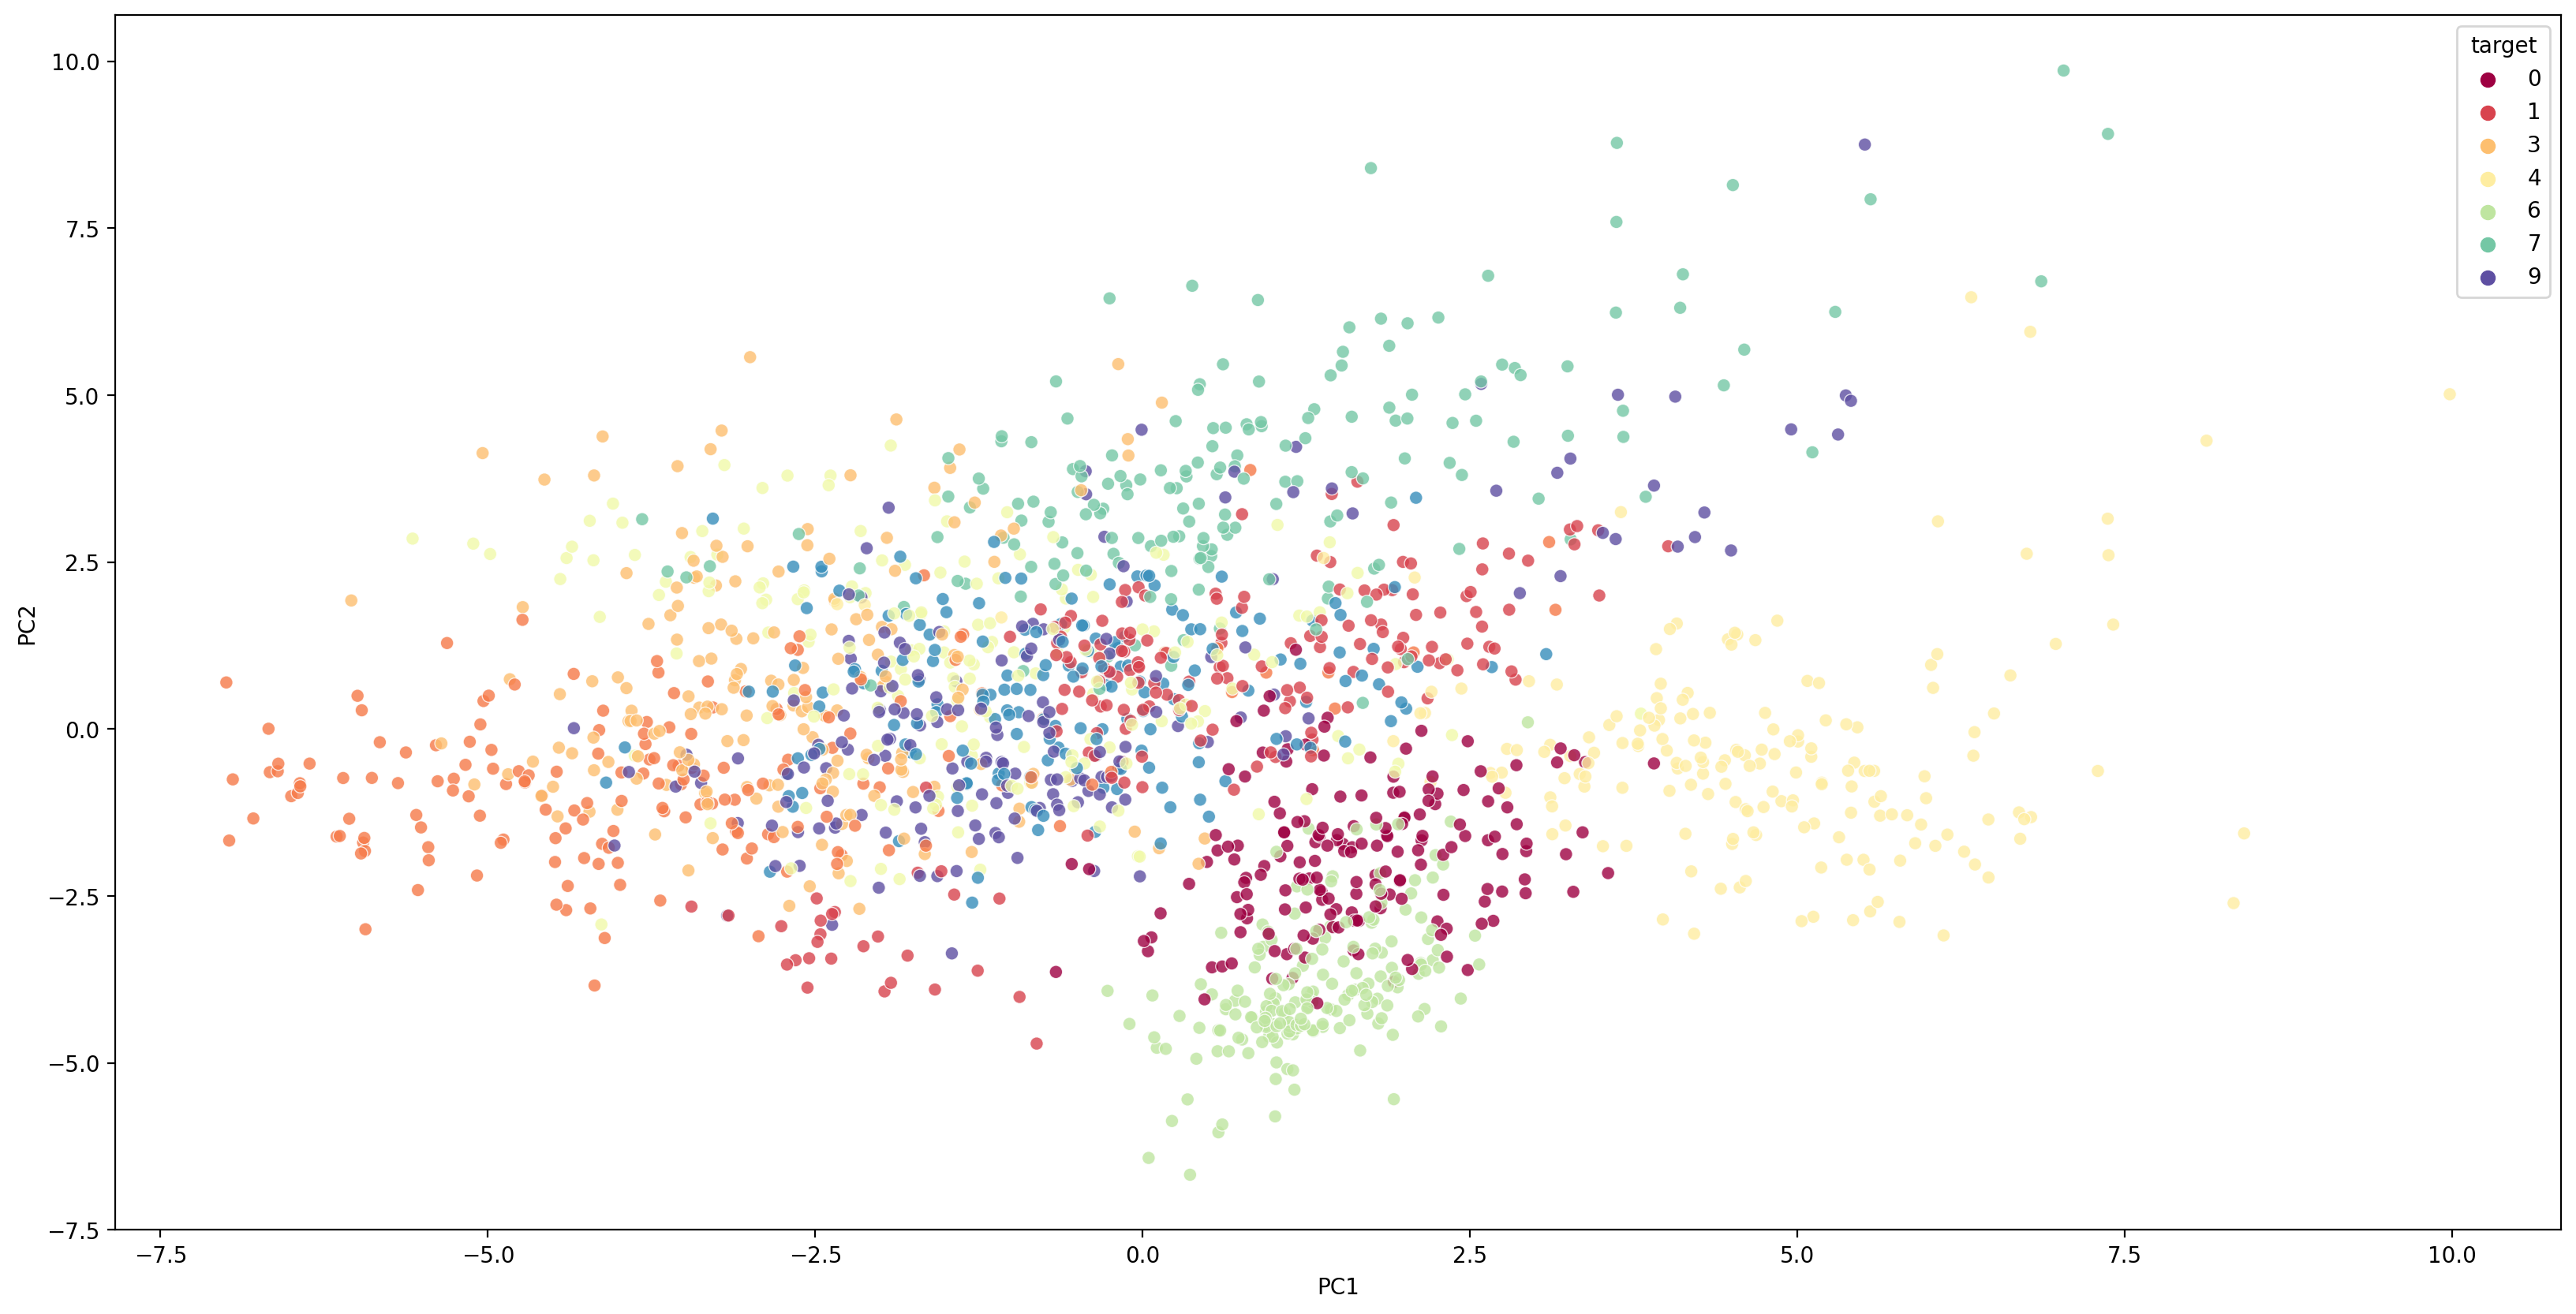

In [71]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=dpca, x='PC1', y='PC2', hue='target', ax=ax, palette='Spectral', alpha=.8);

# LDA

In [72]:
## LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [78]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [88]:
n_component = 2
lda = LDA(n_components=n_component)
X_lda = lda.fit_transform(X_s, y)
dlda = pd.DataFrame(X_lda, columns=[f'nu_{i}' for i in range(1, n_component+1)])
dlda['target'] = y
dlda

/Users/jessadakorn/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


nu_1      nu_2  target
0    -2.014632 -5.623486       0
1     0.220967  3.592400       1
2     2.234855  2.709504       2
3     2.760965 -0.624427       3
4    -5.845449  1.754015       4
...        ...       ...     ...
1792  1.213858 -2.473313       9
1793 -2.456013 -4.420402       0
1794 -1.046972  1.483677       8
1795  0.407873 -1.991673       9
1796  0.174145  0.887175       8

[1797 rows x 3 columns]

<Axes: xlabel='nu_1', ylabel='nu_2'>

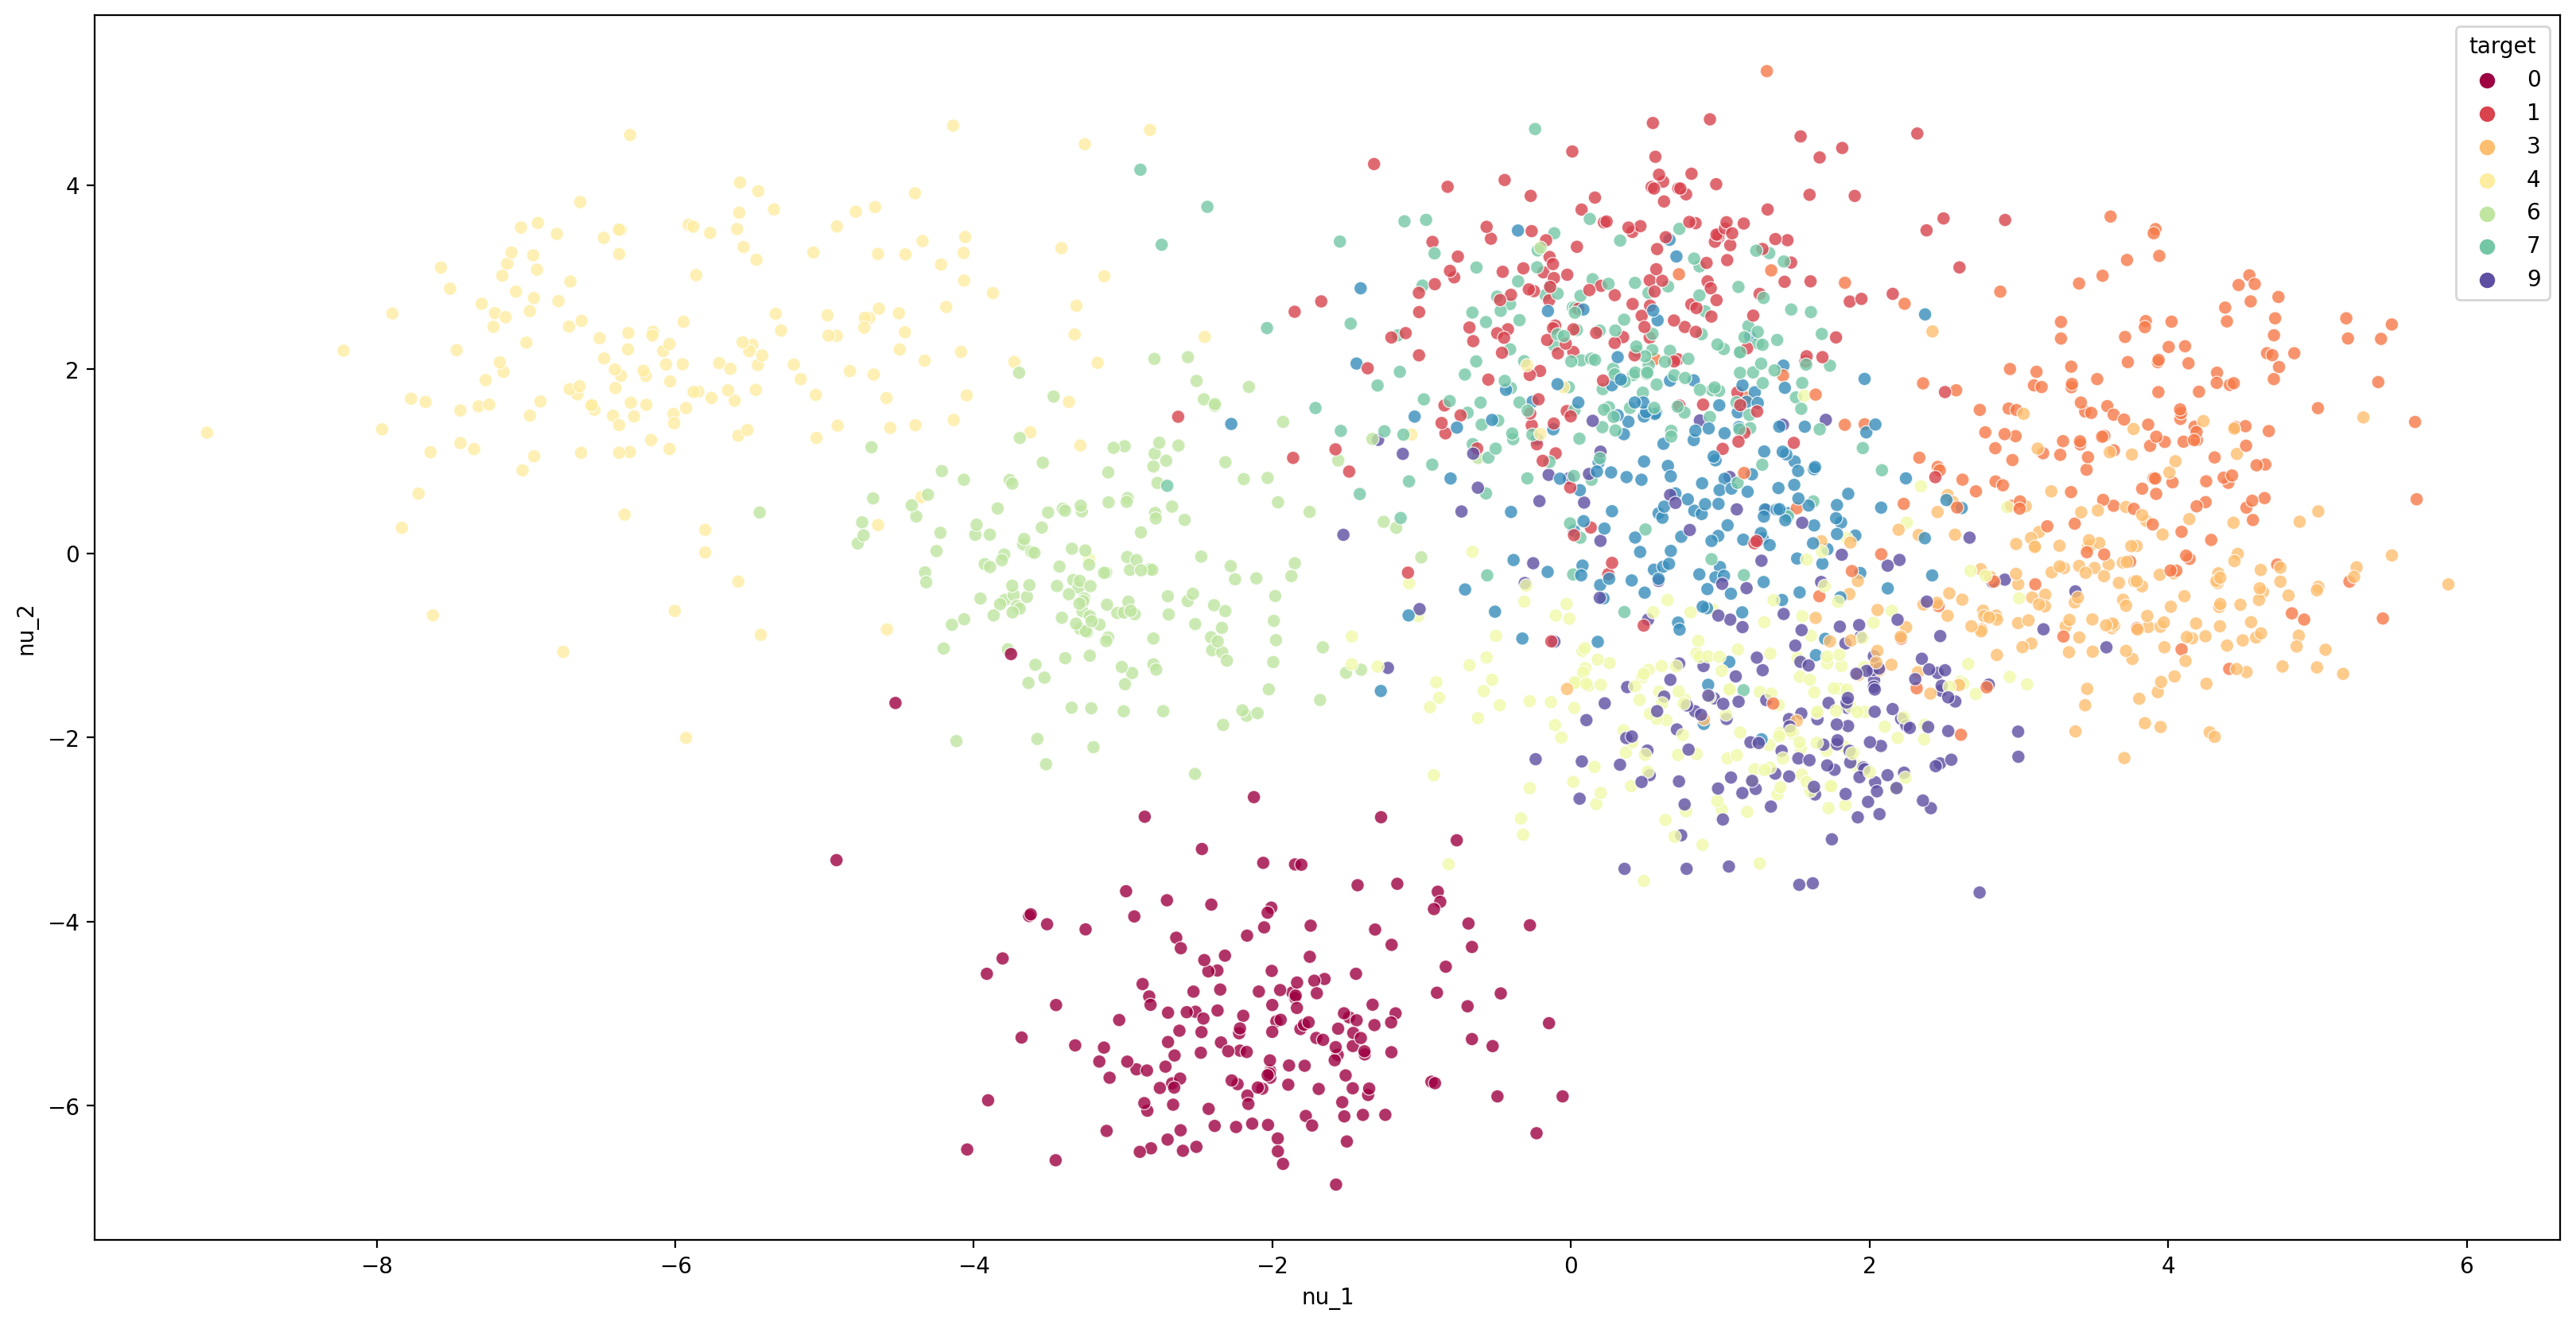

In [92]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=dlda, x='nu_1', y='nu_2', hue='target', palette='Spectral', alpha=.8)

# KPCA

In [102]:
## KPCA
from sklearn.decomposition import KernelPCA

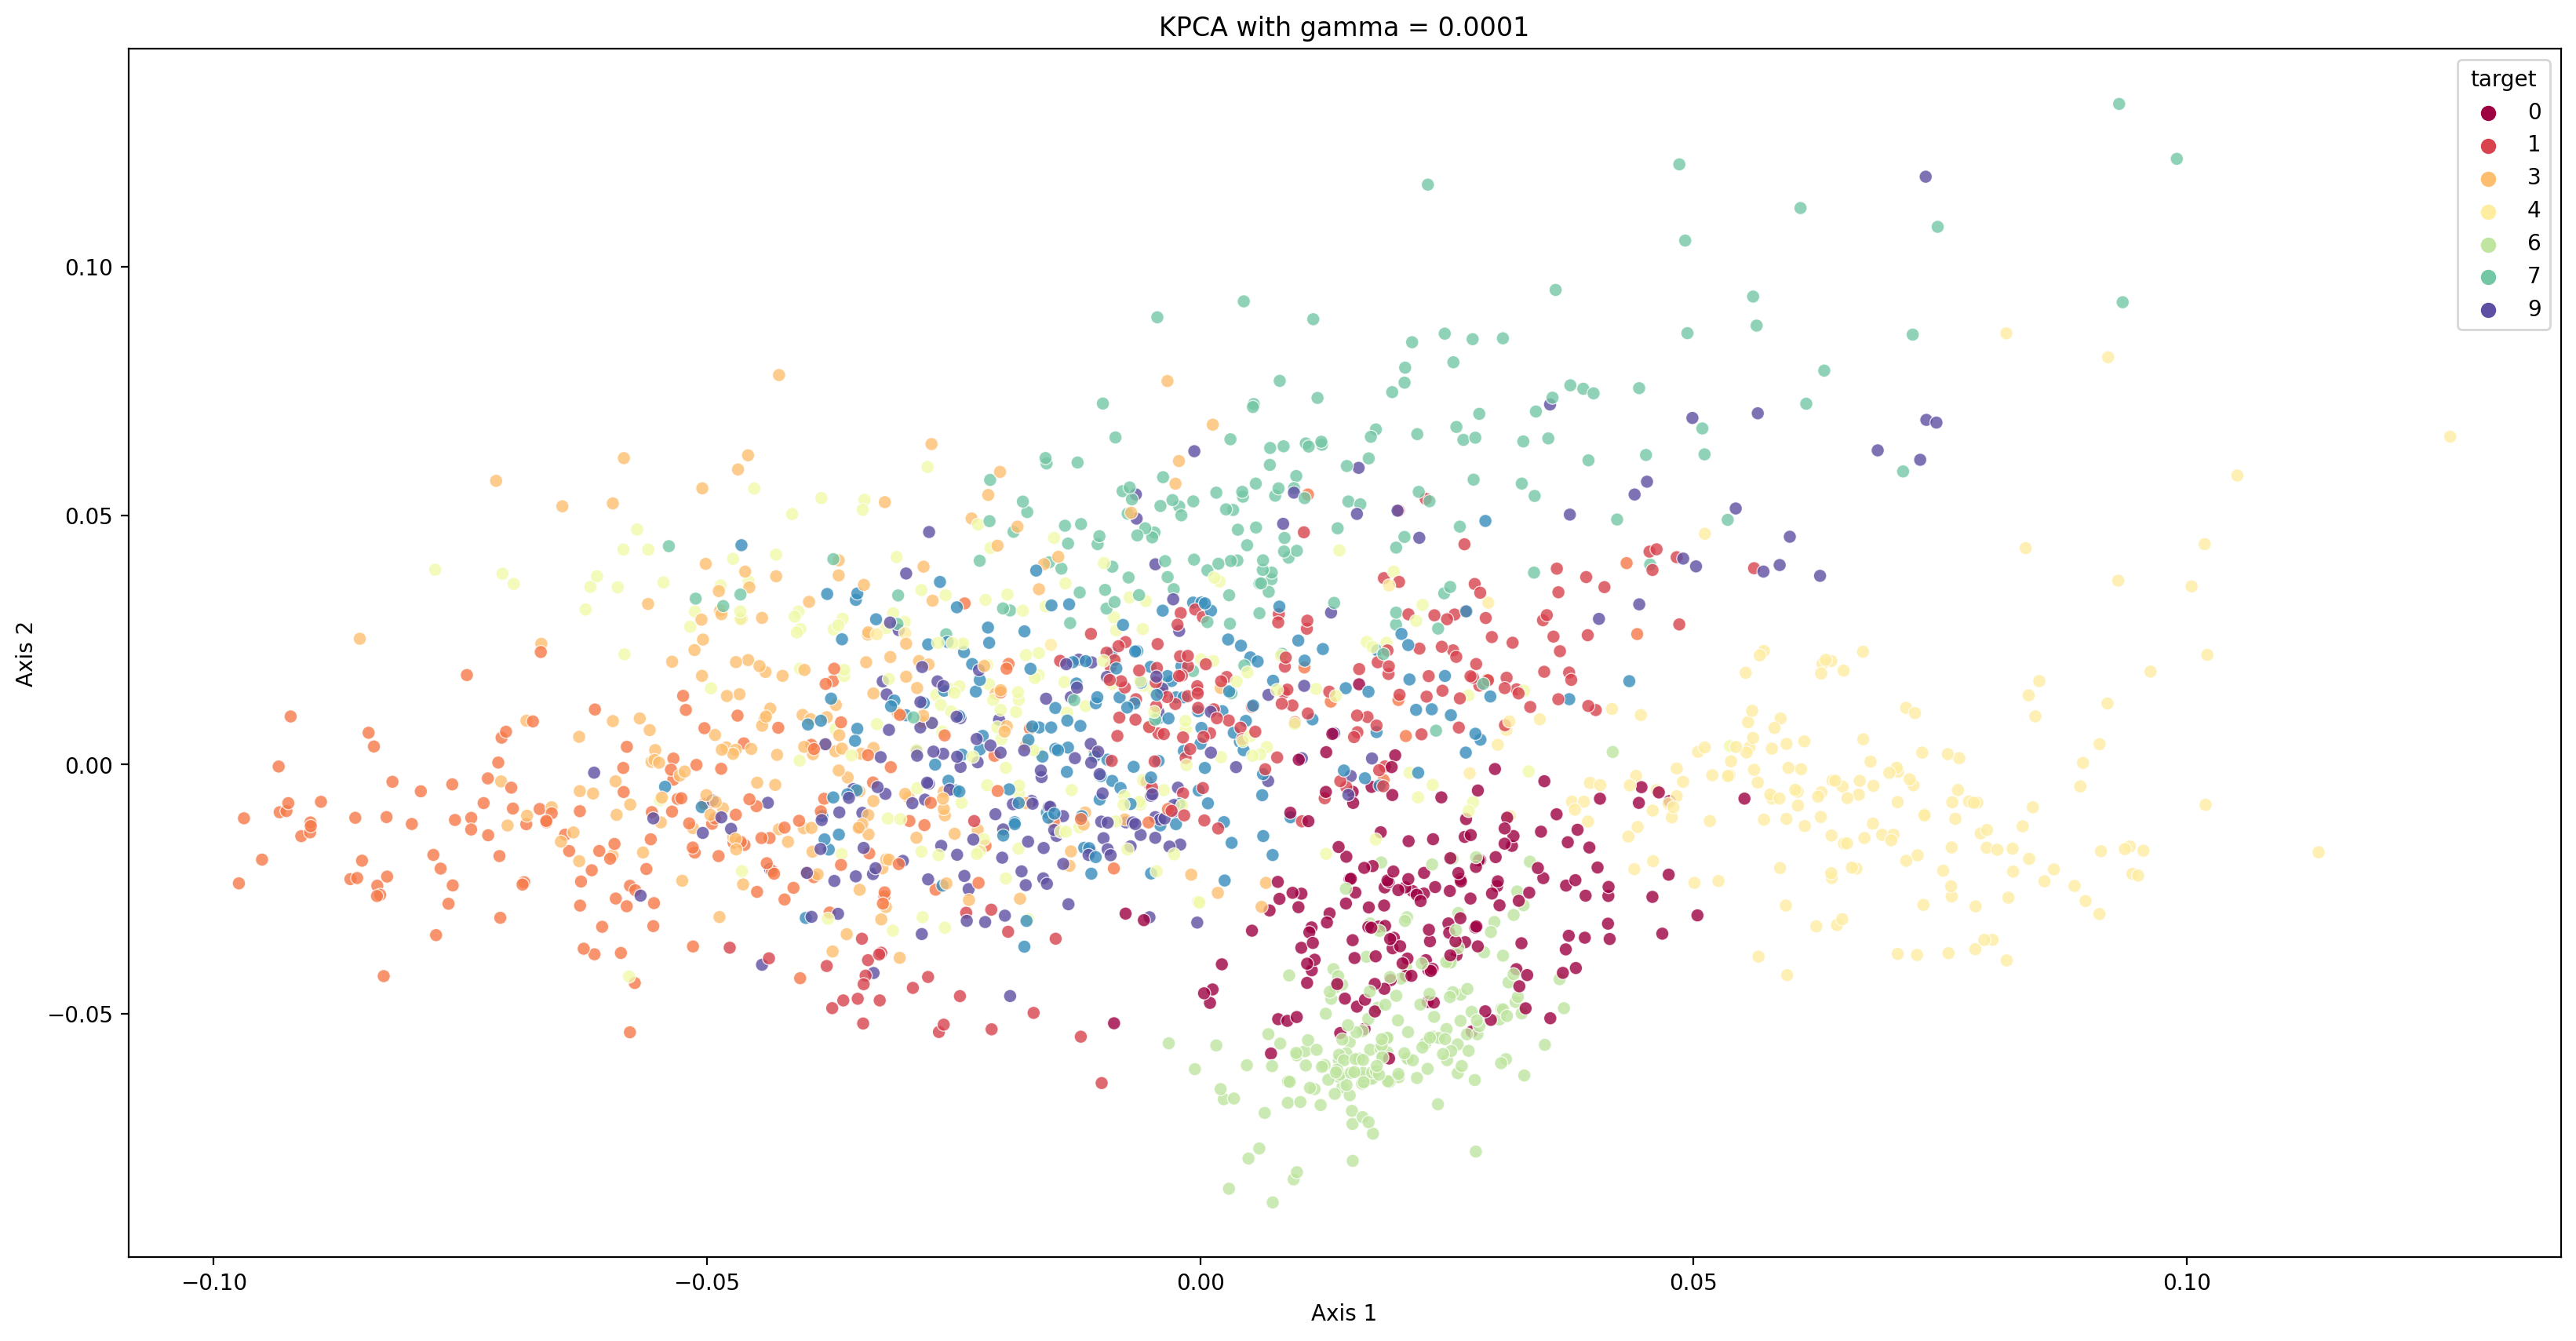

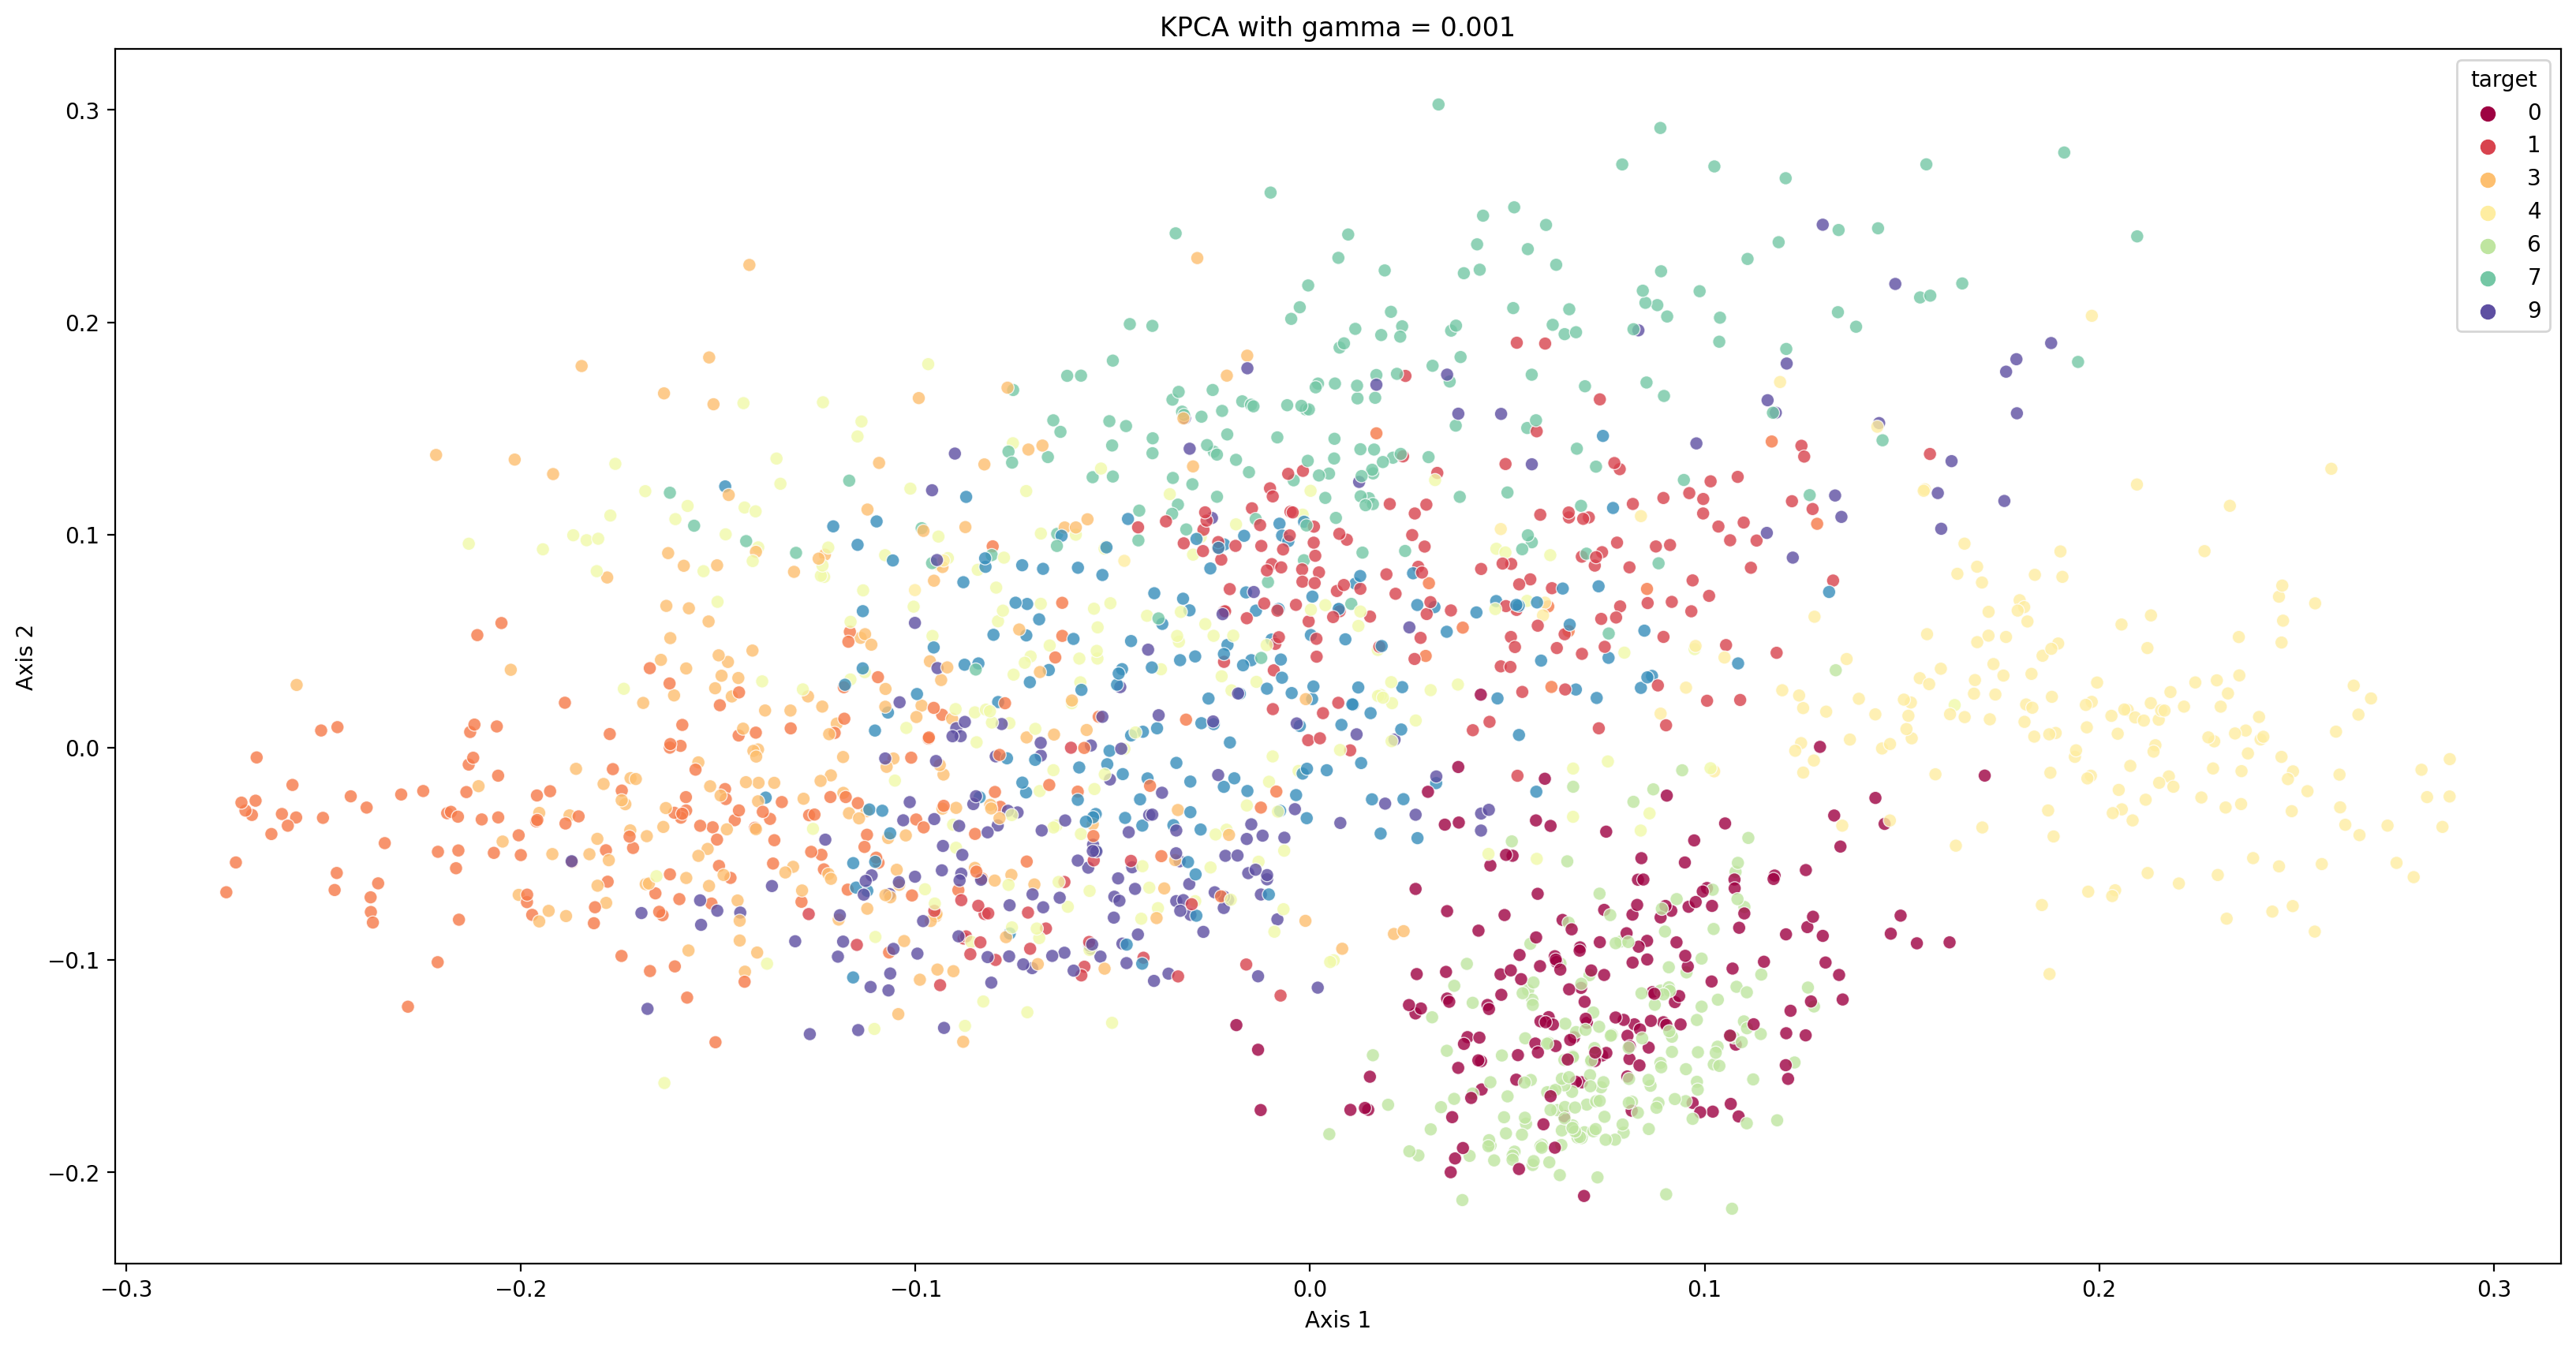

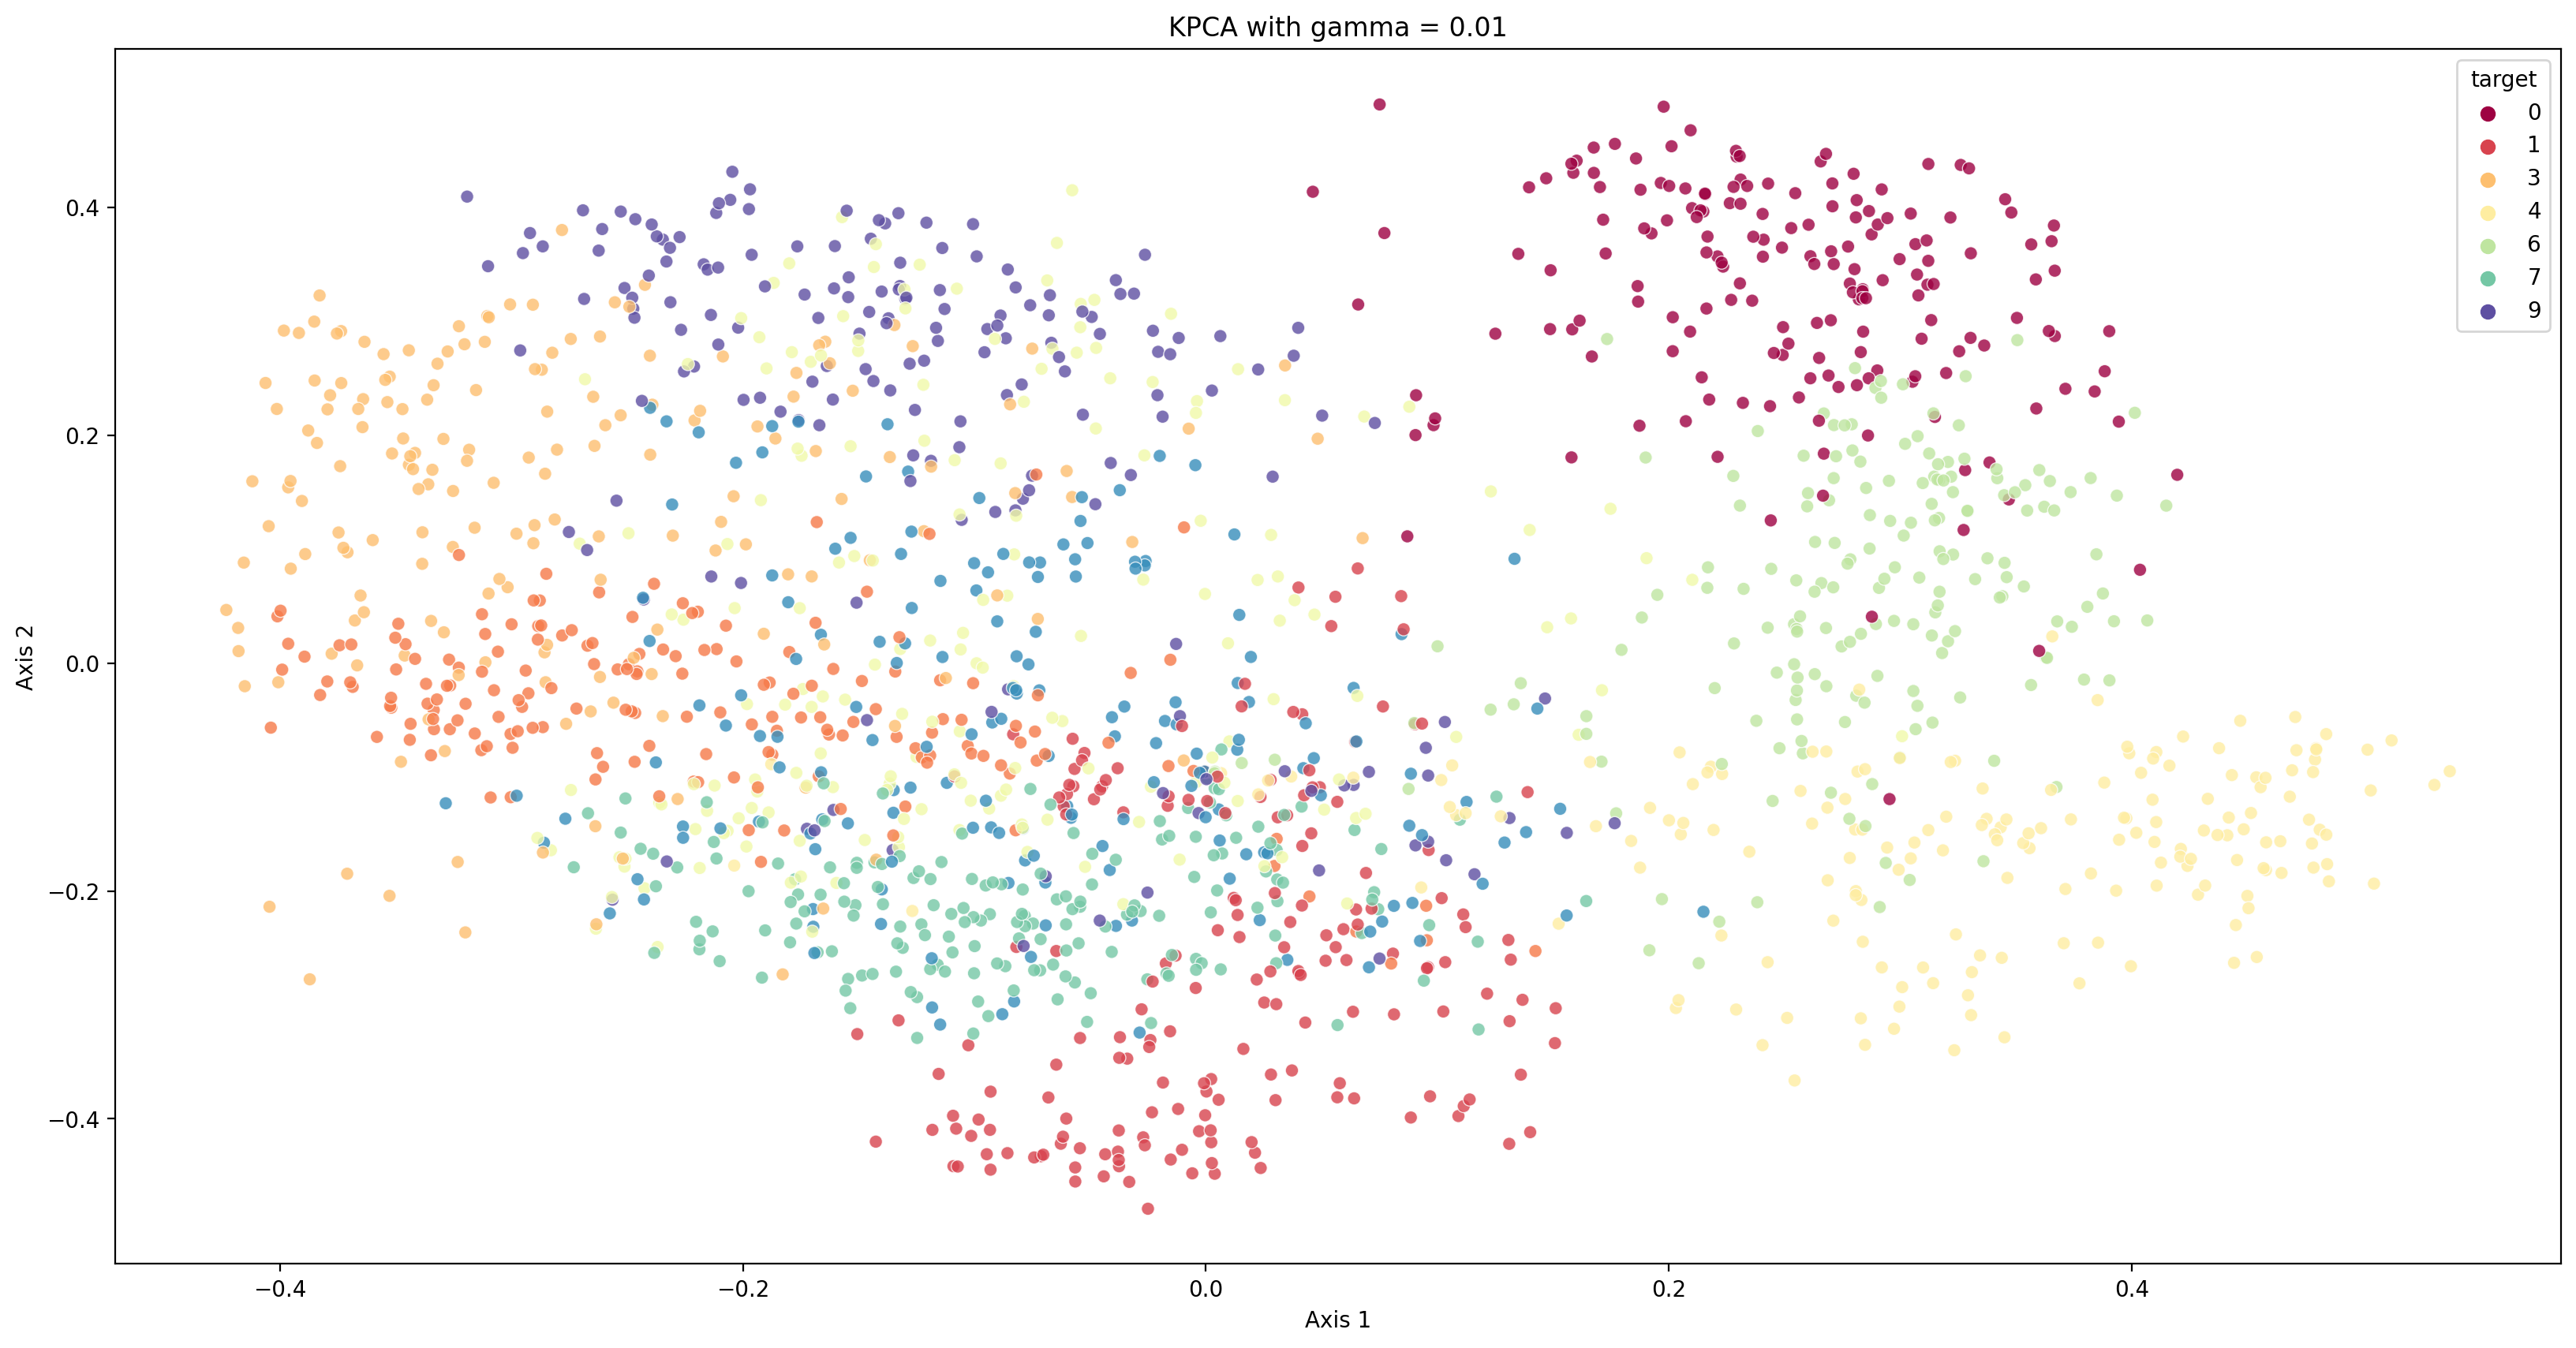

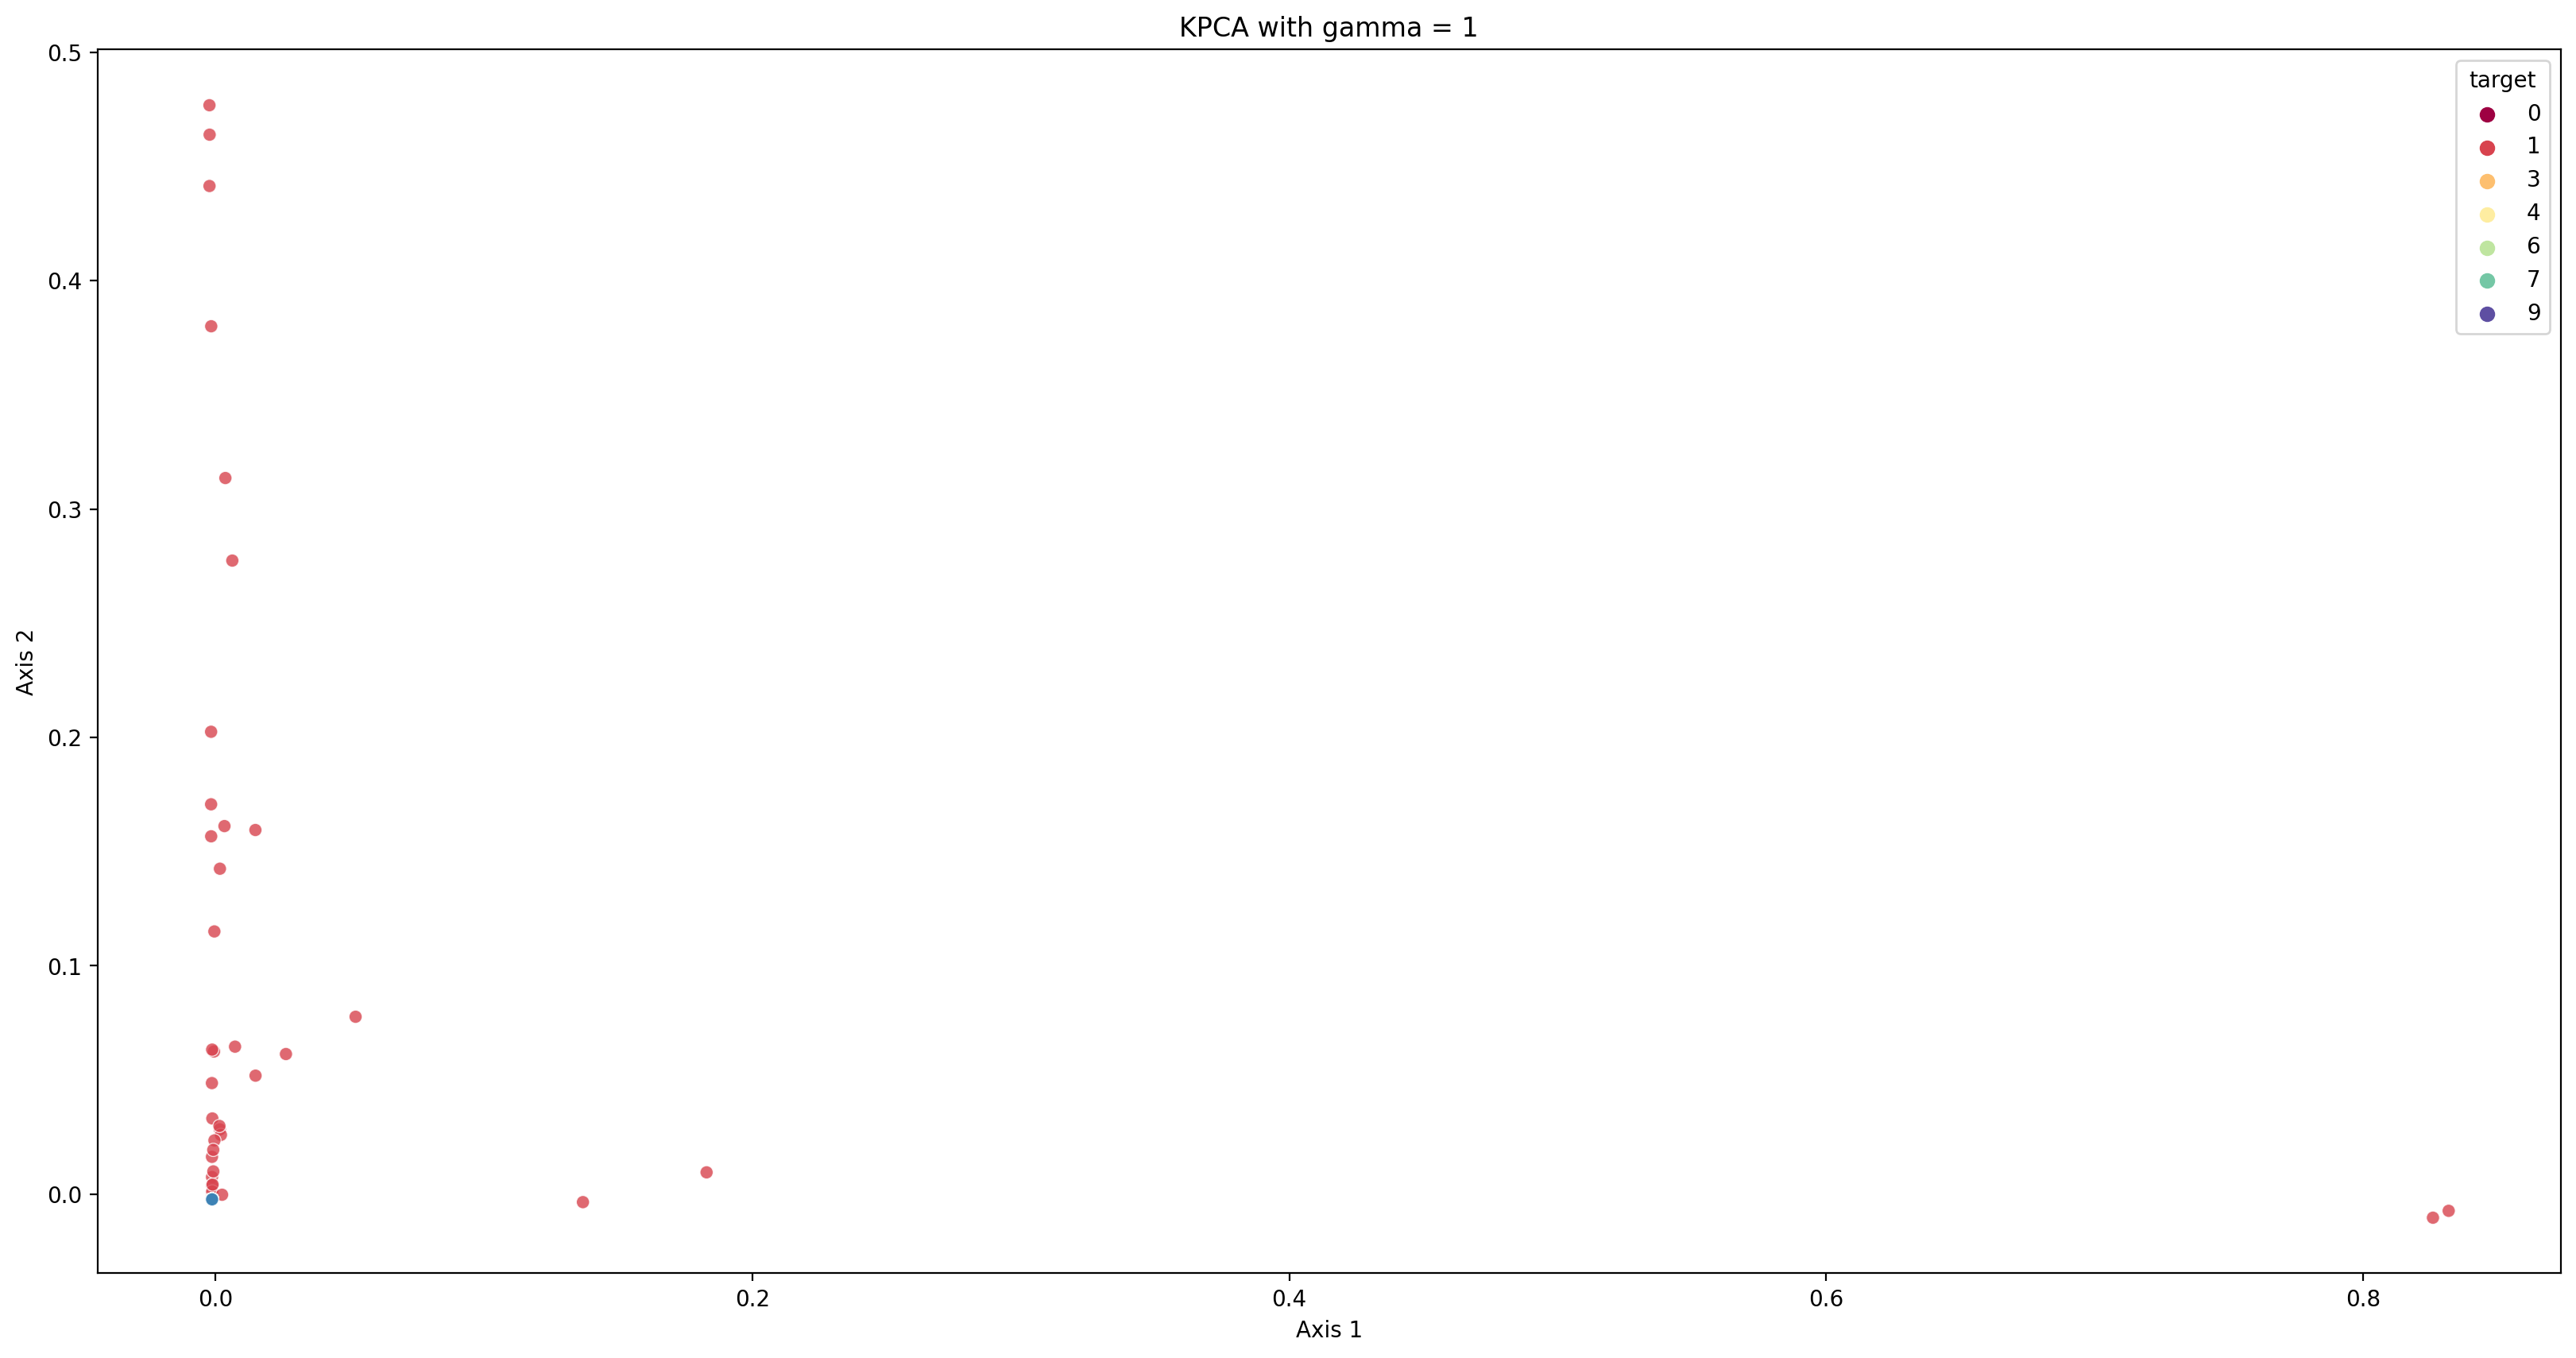

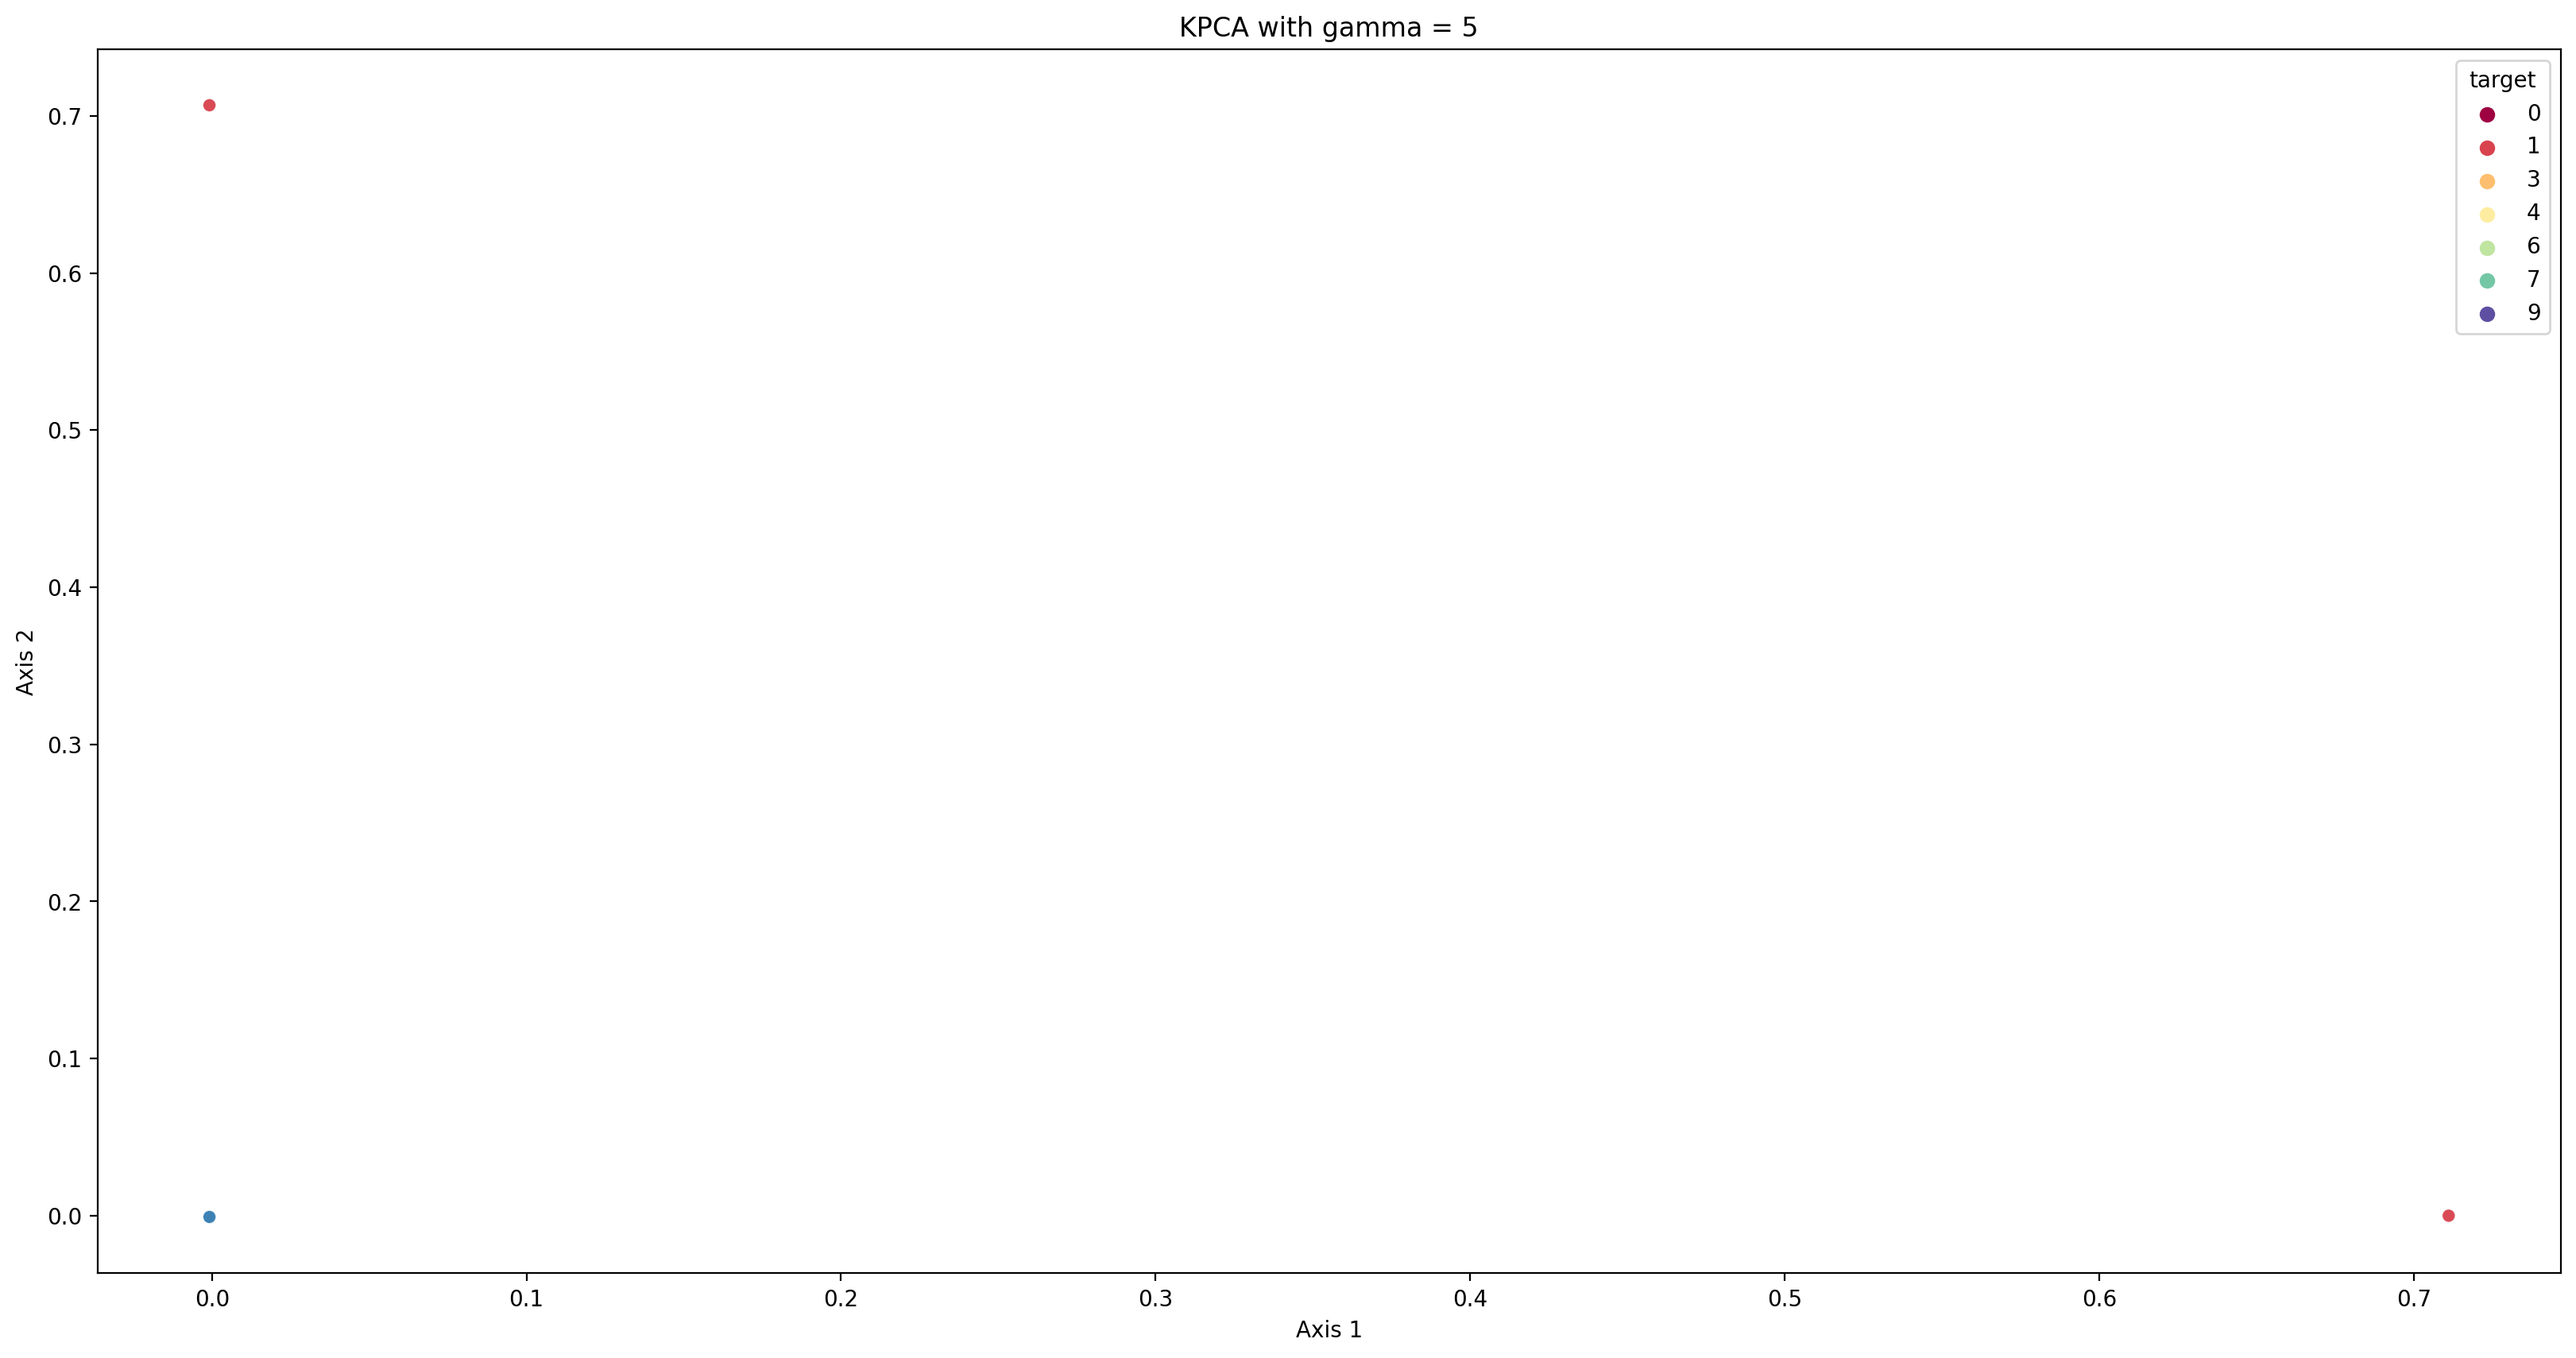

In [121]:
gamma = [.0001, .001, .01, 1, 5]
for g in gamma:
    kpca = KernelPCA(n_components=2, gamma=g, kernel='rbf')
    X_kpca = kpca.fit_transform(X_s)
    dkpca = pd.DataFrame(X_kpca, columns=[f'KPC{n}' for n in range(1, 3)])
    dkpca['target'] = y
    
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.scatterplot(data=dkpca, x='KPC1', y='KPC2', hue='target', palette='Spectral', alpha=.8)
    ax.set_title(f'KPCA with gamma = {g}')
    ax.set_xlabel('Axis 1')
    ax.set_ylabel('Axis 2');

# TSNE

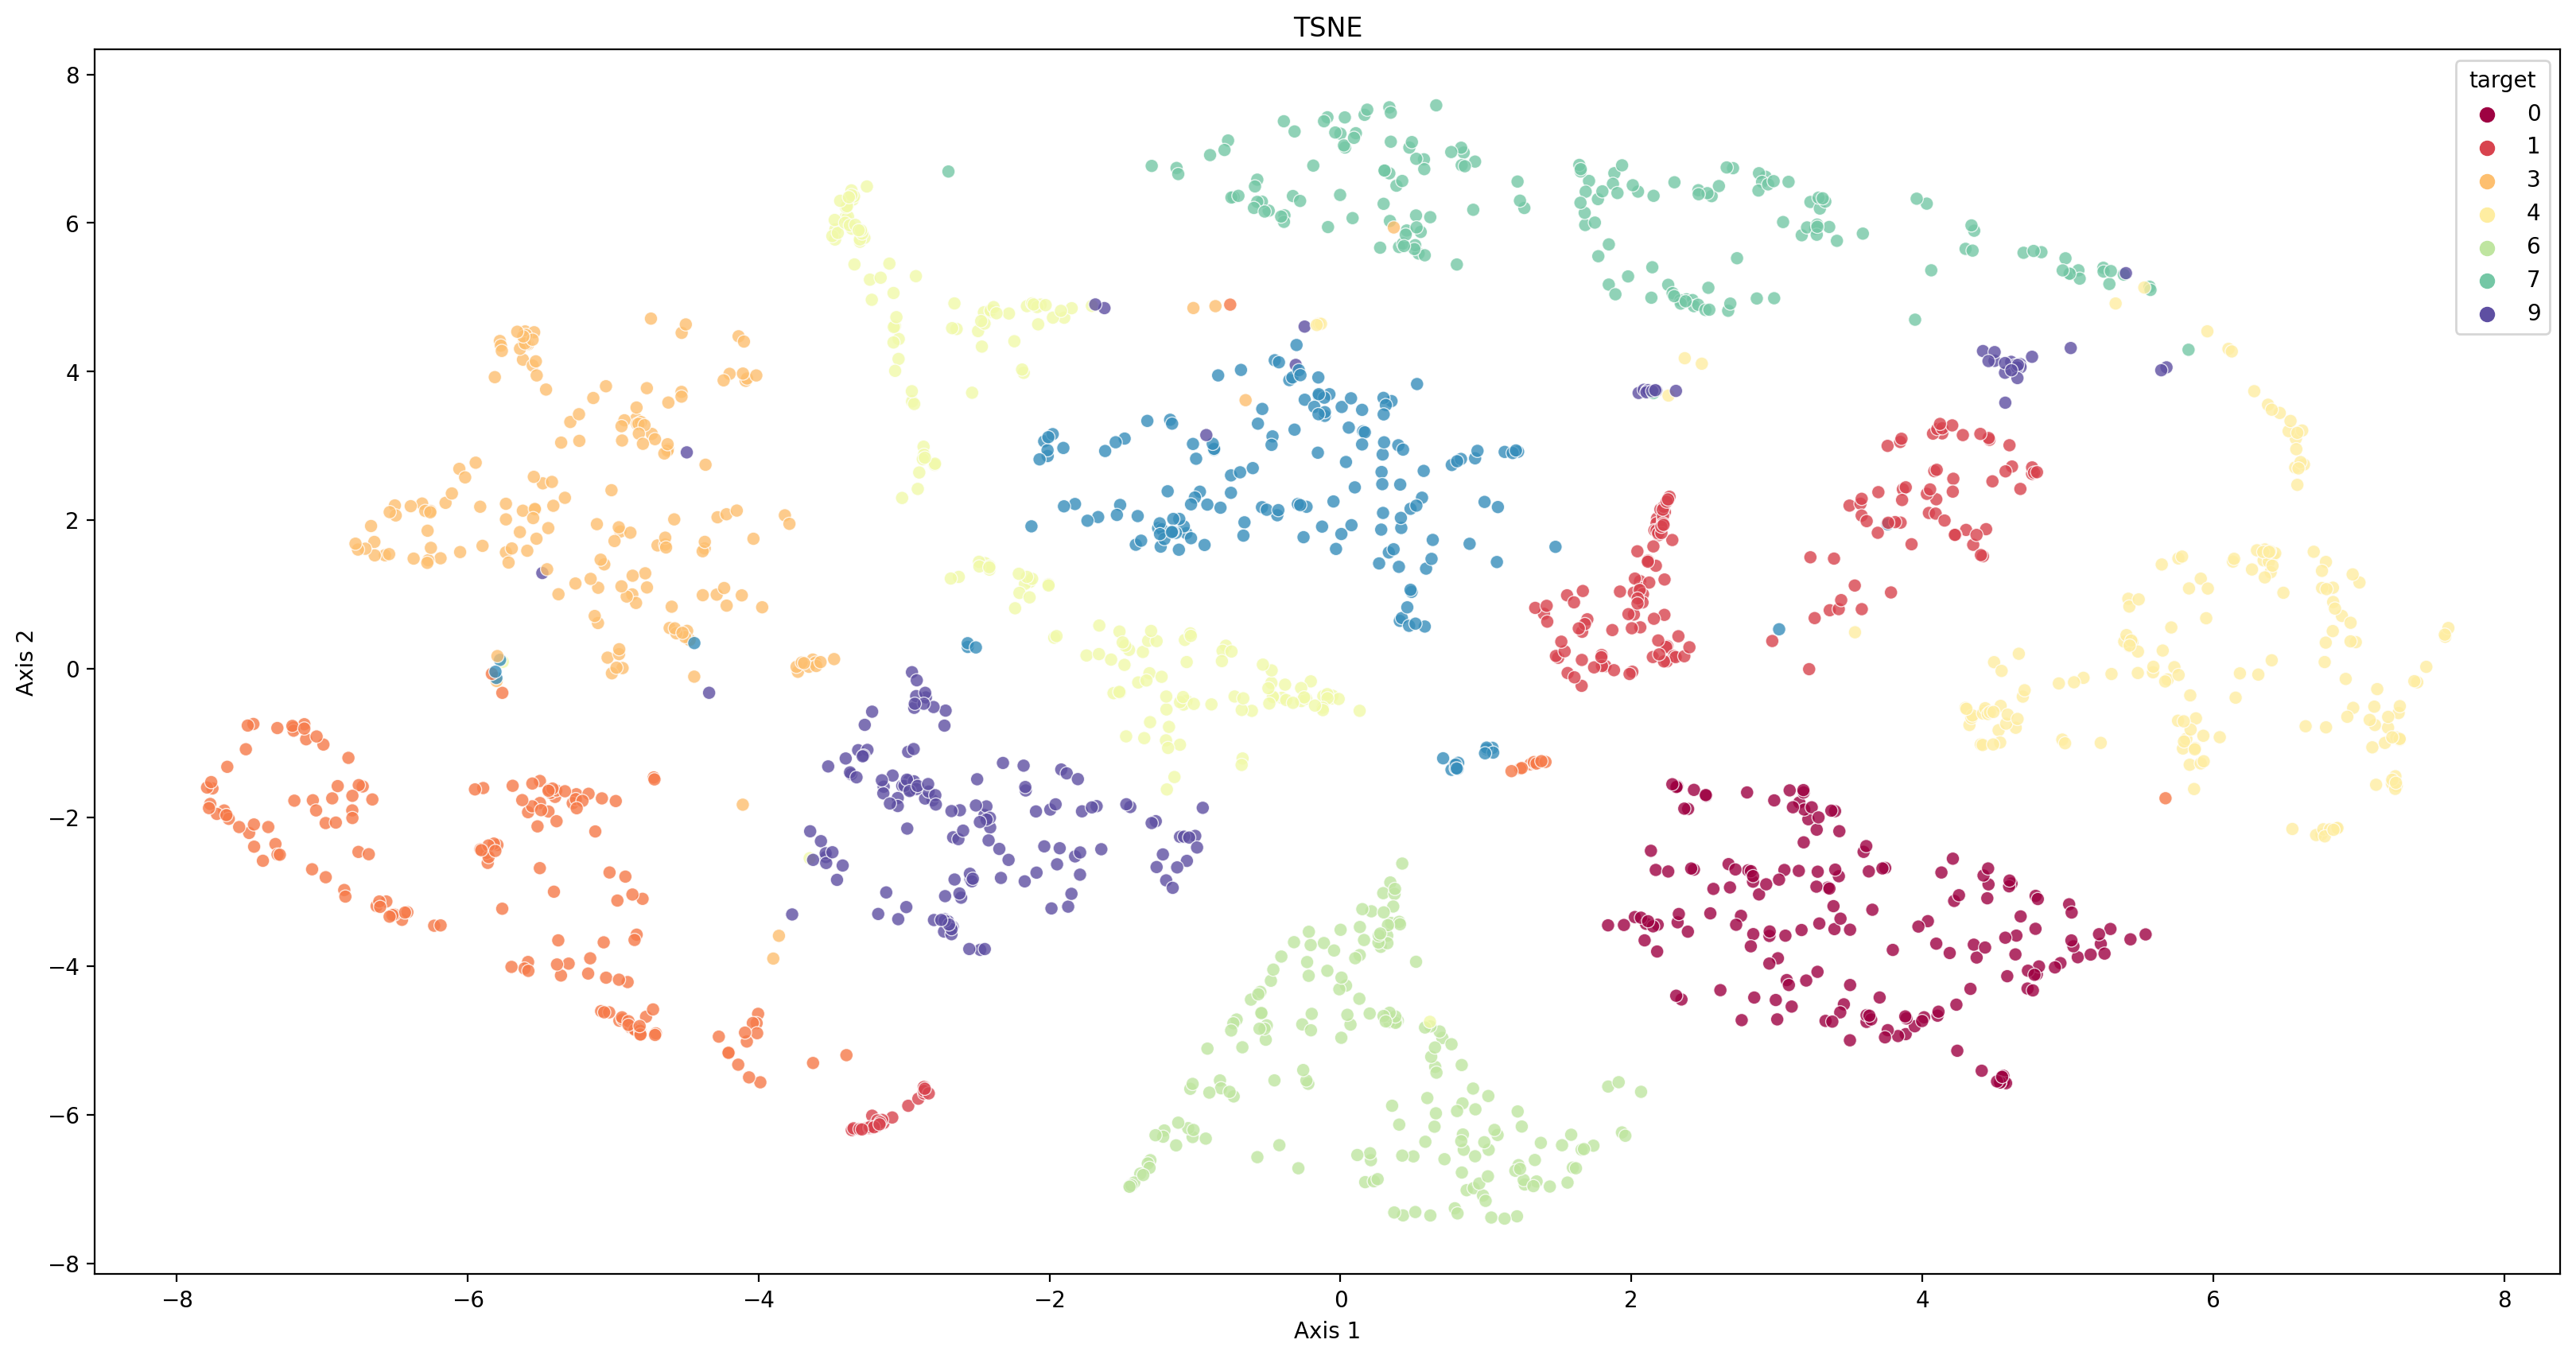

In [126]:
## TSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=10, learning_rate=.1)
X_tsne = tsne.fit_transform(X_s)
dtsne = pd.DataFrame(X_tsne, columns=[f'TSNE{n}' for n in range(1, 3)])
dtsne['target'] = y

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=dtsne, x='TSNE1', y='TSNE2', hue='target', palette='Spectral', alpha=.8)
ax.set_title(f'TSNE')
ax.set_xlabel('Axis 1')
ax.set_ylabel('Axis 2');

# UMAP

In [133]:
import umap.umap_ as umap

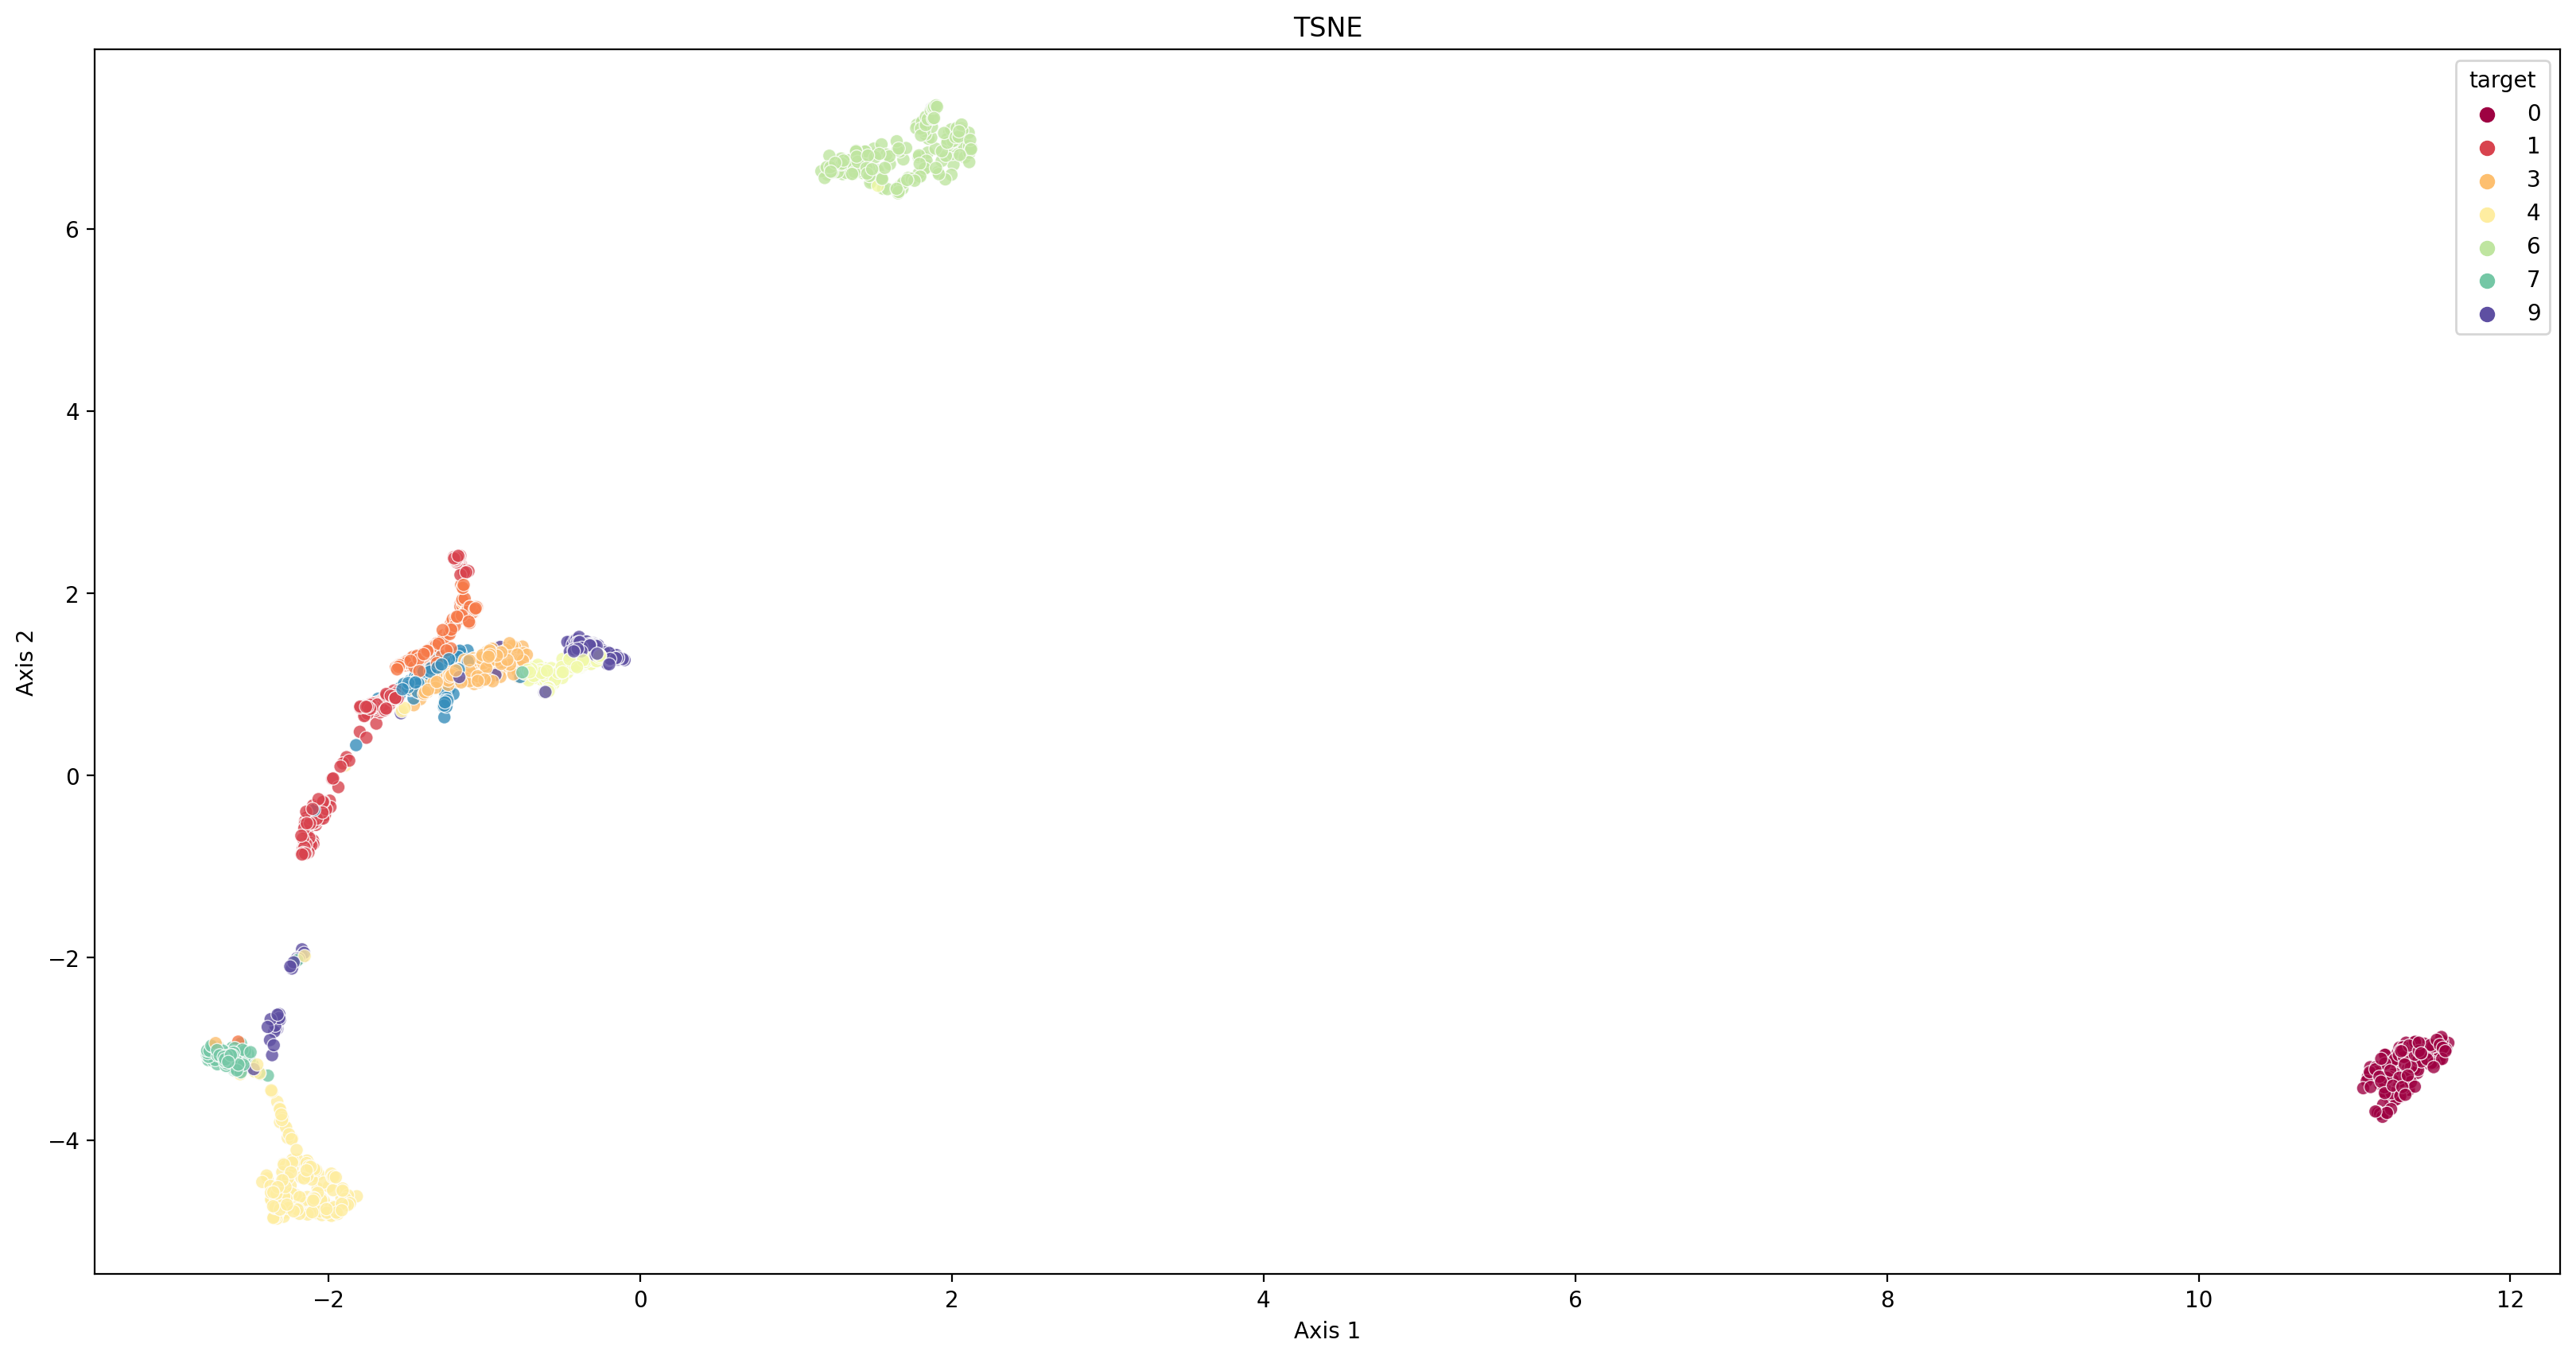

In [138]:
ump = umap.UMAP(n_components=15)
X_umap = ump.fit_transform(X_s)
dumap = pd.DataFrame(X_umap, columns=[f'UMAP{n}' for n in range(1, 16)])
dumap['target'] = y

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=dumap, x='UMAP1', y='UMAP2', hue='target', palette='Spectral', alpha=.8)
ax.set_title(f'TSNE')
ax.set_xlabel('Axis 1')
ax.set_ylabel('Axis 2');